<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

West Virginia has the policy to increase the participation rate in 2018 by offering the free SAT School DAY to students. The aim of this policy is opening the door to college, university and scholarship. This policy increased the participation rate significantly, but the total score did not increase. So, if West Virginia wants to increase both participation rate and average score. How to adjust the policy to be more effective?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

**SAT School Day in West Virginia**

One reason for 2018-2019's increased SAT participation is the continued growth of SAT School Day, including in West Virginia, which offered free SAT School Day to every student in 2018-2019. School Day gives more chance for all students to access the SAT and provides familiar surroundings with people they know. Students take the test at their school, during a regular school day, usually, at no cost to them ([*source*](https://reports.collegeboard.org/archive/sat-suite-program-results/2019/benefits-sat-school-day)). For West Virginia, this state offers the free SAT School Day to students and aims to increase the participation rate. Free SAT School day can help students to open the door to college, university and scholarship ([*source*](https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about)).

### Datasets for this problem statement
* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State which consists of the participation percentage, score for each part and composite
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State which consists of the participation percentage and composite
* [`act_2019.csv`](./data/act_2019.csv): 2019 ACT Scores by State which consists of the participation percentage and composite
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State which consists of the participation percentage, score for each part and total
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State which consists of the participation percentage, score for each part and total
* [`sat_2019.csv`](./data/sat_2019.csv): 2019 SAT Scores by State which consists of the participation percentage, score for each part and total
* [`sat_act_by_college.csv`](./data/sat_act_by_college.csv): Range of Accepted ACT & SAT Student by Colleges
* [`act_2019_ca.csv`](./data/act_2019_ca.csv): ACT Scores in California by School in 2019 (This dataset is used for EDA part only)

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean(number):
    
    """This function calculate mean."""
    
    cum = 0
    for num in number:
        cum += num
    return cum/len(number)

In [2]:
number = [2.5, 4, 6, 8, 10]
mean(number)

6.1

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [3]:
def stdv(number):
    
    """This function calculates standard deviation."""
    
    avg = mean(number)
    cum = 0
    for num in number:
        cum += ((num -avg)**2) 
    result = ((1/len(number))* cum)**0.5
    return round(result,2)

In [4]:
number = [1,-2, 3, 4, 5, 6, 7, 8, 10]
stdv(number)

3.46

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
def percent_to_float(number_string):
    
    """This function convert string of percentage to be float"""
    
    number_nopercent = number_string.replace('%', '')
    number = float(number_nopercent)
    result = number/100.0
    return result

In [6]:
percent = '30.5%'
percent_to_float(percent)

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [7]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

### ACT 2018 - 2019

### 1. Importing Data

All 3-year ACT score datasets are imported by the library named 'Pandas'. This is the list of file name.
- `act_2017`: The ACT score in 2017 by state
- `act_2018`: The ACT score in 2018 by state
- `act_2019`: The ACT score in 2019 by state

After importing data into the variables,`act_2017` has 52 rows with 7 columns (State, Participation, Score for each part, Composite) while `act_2018` and `act_2019` have 52 rows with 3 columns (State, Participation, Composite).

In [8]:
#import data by pandas
act_2017 = pd.read_csv('data/act_2017.csv')
act_2018 = pd.read_csv('data/act_2018.csv')
act_2019 = pd.read_csv('data/act_2019.csv')

In [9]:
#display the data
display(act_2017.head())
display(act_2018.head())
display(act_2019.head())

State Participation  English  Math  Reading  Science Composite
0  National           60%     20.3  20.7     21.4     21.0      21.0
1   Alabama          100%     18.9  18.4     19.7     19.4      19.2
2    Alaska           65%     18.7  19.8     20.4     19.9      19.8
3   Arizona           62%     18.6  19.8     20.1     19.8      19.7
4  Arkansas          100%     18.9  19.0     19.7     19.5      19.4

State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7

State Participation  Composite
0     Alabama          100%       18.9
1      Alaska           38%       20.1
2     Arizona           73%       19.0
3    Arkansas          100%       19.3
4  California           23%       22.6

In [10]:
#Check the row and column counts
display(act_2017.shape)
display(act_2018.shape)
display(act_2019.shape)

(52, 7)

(52, 3)

(52, 3)

### 2. Checking missing values and any obvious issues

All of the data have no missing value but they have different data in the column named 'State'. This is detected by using the set of data in the 'State' column. The result is following this.

- Comparing between `act_2017` and `act_2018`: State which found in `act_2017` but not found in `act_2018` are **'National'** and **'District of Columbia'**, and state which found in `act_2018` but not found in `act_2017` is **'District of columbia'**

- Comparing between `act_2018` and `act_2019`: State which found in `act_2018` but not found in `act_2019` is **'District of columbia'**, and state which found in `act_2019` but not found in `act_2018` are **'National'** and **'District of Columbia'**

For `act_2018`, it has the duplicated data named 'Maine' which needs to be removed.

In [11]:
#Check the missing value
display(act_2017.isnull().sum())
display(act_2018.isnull().sum())
display(act_2019.isnull().sum())

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

State            0
Participation    0
Composite        0
dtype: int64

State            0
Participation    0
Composite        0
dtype: int64

In [12]:
#Compare the data between 'act_2017' and 'act_2018' in the 'State' column by using set
act17 = list(act_2017['State'].unique())
set(act17)

act18 = list(act_2018['State'].unique())
set(act18)

print(set(act17).difference(set(act18)))

print(set(act18).difference(set(act17)))

{'District of Columbia', 'National'}
{'District of columbia'}


In [13]:
#Compare the data between 'act_2018' and 'act_2019' in the 'State' column by using set
act18 = list(act_2018['State'].unique())
set(act18)

act19 = list(act_2019['State'].unique())
set(act19)

print(set(act18).difference(set(act19)))

print(set(act19).difference(set(act18)))

{'District of columbia'}
{'District of Columbia', 'National'}


In [14]:
#Check the duplicated row
display(act_2017[act_2017.duplicated()])
display(act_2018[act_2018.duplicated()])
display(act_2019[act_2019.duplicated()])

Empty DataFrame
Columns: [State, Participation, English, Math, Reading, Science, Composite]
Index: []

State Participation  Composite
20  Maine            7%       24.0

Empty DataFrame
Columns: [State, Participation, Composite]
Index: []

### 3. Fix the issues

- Replace the 'District of columbia' in `act_2017` with 'District of Columbia'
- Drop the duplicate row that means drop 'Maine' in `act_2017`

In [15]:
#Check 'District of columbia' is in 'act_2018'
act_2018.loc[act_2018['State'] == 'District of columbia']

State Participation  Composite
8  District of columbia           32%       23.6

In [16]:
#Replace 'District of columbia' in 'act_2018' with 'District of Columbia'
act_2018 = act_2018.replace({'District of columbia': 'District of Columbia'})

In [17]:
#Recheck that the replace method work and the 'District of columbia' is replaced
act_2018.loc[act_2018['State'] == 'District of Columbia']

State Participation  Composite
8  District of Columbia           32%       23.6

In [18]:
#Recheck the replacing by using set

print(set(list(act_2018['State'].unique())).difference(set(list(act_2019['State'].unique()))))

print(set(list(act_2019['State'].unique())).difference(set(list(act_2018['State'].unique()))))

set()
{'National'}


In [19]:
#Drop the duplicate row (drop 'Maine')
act_2018.drop_duplicates(inplace = True)
act_2018.head()

State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7

In [20]:
#Reset index after dropping
act_2018.reset_index(drop = True).head()

State Participation  Composite
0     Alabama          100%       19.1
1      Alaska           33%       20.8
2     Arizona           66%       19.2
3    Arkansas          100%       19.4
4  California           27%       22.7

### 4. Checking and changing data type

Checking data type of all data and that found data type are different and need to be converted.
- `act_2017`: 'State', 'Participation' and 'Composite' are **object**, while 'English', 'Math', 'Reading', 'Science' are **float**.
- `act_2018`: 'State', 'Participation' are **object**, while 'Composition' are **float**.
- `act_2019`: 'State', 'Participation' are **object**, while 'Composition' are **float**.

To convert the participation in to float, I use the function named **'percent_to_float'** that I created above with `.apply` and `lambda`.

In [21]:
#Check data type
display(act_2017.dtypes)
display(act_2018.dtypes)
display(act_2019.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

State             object
Participation     object
Composite        float64
dtype: object

State             object
Participation     object
Composite        float64
dtype: object

In [22]:
#Change data type for the data in 'Participation' column
#and calculate them into float by using the function named 'percent_to_float' 

act_2017['Participation'] = act_2017['Participation'].apply(lambda x: percent_to_float(x))
display(act_2017)

act_2018['Participation'] = act_2018['Participation'].apply(lambda x: percent_to_float(x))
display(act_2018.head())

act_2019['Participation'] = act_2019['Participation'].apply(lambda x: percent_to_float(x))
display(act_2019.head())

State  Participation  English  Math  Reading  Science  \
0               National           0.60     20.3  20.7     21.4     21.0   
1                Alabama           1.00     18.9  18.4     19.7     19.4   
2                 Alaska           0.65     18.7  19.8     20.4     19.9   
3                Arizona           0.62     18.6  19.8     20.1     19.8   
4               Arkansas           1.00     18.9  19.0     19.7     19.5   
5             California           0.31     22.5  22.7     23.1     22.2   
6               Colorado           1.00     20.1  20.3     21.2     20.9   
7            Connecticut           0.31     25.5  24.6     25.6     24.6   
8               Delaware           0.18     24.1  23.4     24.8     23.6   
9   District of Columbia           0.32     24.4  23.5     24.9     23.5   
10               Florida           0.73     19.0  19.4     21.0     19.4   
11               Georgia           0.55     21.0  20.9     22.0     21.3   
12                Hawaii           0.90     17.8  19.2     19.2     19.3   
13                 Idaho           0.38     21.9  21.8     23.0     22.1   
14              Illinois           0.93     21.0  21.2     21.6     21.3   
15               Indiana           0.35     22.0  22.4     23.2     22.3   
16                  Iowa           0.67     21.2  21.3     22.6     22.1   
17                Kansas           0.73     21.1  21.3     22.3     21.7   
18              Kentucky           1.00     19.6  19.4     20.5     20.1   
19             Louisiana           1.00     19.4  18.8     19.8     19.6   
20                 Maine           0.08     24.2  24.0     24.8     23.7   
21              Maryland           0.28     23.3  23.1     24.2      2.3   
22         Massachusetts           0.29     25.4  25.3     25.9     24.7   
23              Michigan           0.29     24.1  23.7     24.5     23.8   
24             Minnesota           1.00     20.4  21.5     21.8     21.6   
25           Mississippi           1.00     18.2  18.1     18.8     18.8   
26              Missouri           1.00     19.8  19.9     20.8     20.5   
27               Montana           1.00     19.0  20.2     21.0     20.5   
28              Nebraska           0.84     20.9  20.9     21.9     21.5   
29                Nevada           1.00     16.3  18.0     18.1     18.2   
30         New Hampshire           0.18     25.4  25.1     26.0     24.9   
31            New Jersey           0.34     23.8  23.8     24.1     23.2   
32            New Mexico           0.66     18.6  19.4     20.4     20.0   
33              New York           0.31     23.8  24.0     24.6     23.9   
34        North Carolina           1.00     17.8  19.3     19.6     19.3   
35          North Dakota           0.98     19.0  20.4     20.5     20.6   
36                  Ohio           0.75     21.2  21.6     22.5     22.0   
37              Oklahoma           1.00     18.5  18.8     20.1     19.6   
38                Oregon           0.40     21.2  21.5     22.4     21.7   
39          Pennsylvania           0.23     23.4  23.4     24.2     23.3   
40          Rhode Island           0.21     24.0  23.3     24.7     23.4   
41        South Carolina           1.00     17.5  18.6     19.1     18.9   
42          South Dakota           0.80     20.7  21.5     22.3     22.0   
43             Tennessee           1.00     19.5  19.2     20.1     19.9   
44                 Texas           0.45     19.5  20.7     21.1     20.9   
45                  Utah           1.00     19.5  19.9     20.8     20.6   
46               Vermont           0.29     23.3  23.1     24.4     23.2   
47              Virginia           0.29     23.5  23.3     24.6     23.5   
48            Washington           0.29     20.9  21.9     22.1     22.0   
49         West Virginia           0.69     20.0  19.4     21.2     20.5   
50             Wisconsin           1.00     19.7  20.4     20.6     20.9   
51               Wyoming           1.00     19.4  19.8     20.8    

State  Participation  Composite
0     Alabama           1.00       19.1
1      Alaska           0.33       20.8
2     Arizona           0.66       19.2
3    Arkansas           1.00       19.4
4  California           0.27       22.7

State  Participation  Composite
0     Alabama           1.00       18.9
1      Alaska           0.38       20.1
2     Arizona           0.73       19.0
3    Arkansas           1.00       19.3
4  California           0.23       22.6

In [23]:
#Recheck data type
display(act_2017.dtypes)
display(act_2018.dtypes)
display(act_2019.dtypes)

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

State             object
Participation    float64
Composite        float64
dtype: object

State             object
Participation    float64
Composite        float64
dtype: object

### 5. Checking statistic summary

The statistic summary from `.describe` shows all statistic values of all columns except 'Composition' in `act_2017`. So, this column is changed the data type from object to be float. The value in 'Composite' in `act_2017` have the weird value '20.2x' so 'x' is removed before changing data type. `str.strip()` is used to remove 'x' and then convert the data type to be float.

In [24]:
#Describe the statistic summary for each data
display(act_2017.describe())
display(act_2018.describe())
display(act_2019.describe())

#act_2017 does not have statistic summary for composite

Participation    English       Math    Reading    Science
count      52.000000  52.000000  52.000000  52.000000  52.000000
mean        0.651538  20.919231  21.173077  22.001923  21.040385
std         0.318325   2.332132   1.963602   2.048672   3.151113
min         0.080000  16.300000  18.000000  18.100000   2.300000
25%         0.310000  19.000000  19.400000  20.475000  19.900000
50%         0.680000  20.550000  20.900000  21.700000  21.150000
75%         1.000000  23.300000  23.100000  24.125000  22.525000
max         1.000000  25.500000  25.300000  26.000000  24.900000

Participation  Composite
count      51.000000  51.000000
mean        0.617255  21.496078
std         0.340371   2.111583
min         0.070000  17.700000
25%         0.285000  19.950000
50%         0.660000  21.300000
75%         1.000000  23.650000
max         1.000000  25.600000

Participation  Composite
count      52.000000  52.000000
mean        0.585385  21.450000
std         0.341883   2.175487
min         0.060000  17.900000
25%         0.247500  19.800000
50%         0.530000  20.950000
75%         1.000000  23.650000
max         1.000000  25.500000

In [25]:
#Check the value in column named 'Composite'
act_2017['Composite'].unique()

array(['21.0', '19.2', '19.8', '19.7', '19.4', '22.8', '20.8', '25.2',
       '24.1', '24.2', '21.4', '19.0', '22.3', '22.6', '21.9', '21.7',
       '20.0', '19.5', '24.3', '23.6', '25.4', '21.5', '18.6', '20.4',
       '20.3', '17.8', '25.5', '23.9', '19.1', '22.0', '21.8', '23.7',
       '24.0', '18.7', '20.7', '23.8', '20.5', '20.2x'], dtype=object)

In [26]:
#Remove 'x' from '20.2x'
act_2017['Composite'] = act_2017['Composite'].str.strip('x')

In [27]:
#Recheck '20.2x' is removed
'20.2x' in act_2017

False

In [28]:
#Change data type of 'Composite' to float
act_2017['Composite'] = act_2017['Composite'].astype('float64')

In [29]:
#Check the information of data
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


### 6. Rename columns

All columns name should be a lower character without a spacebar and special characters except '_'.

In [30]:
#Convert the column name in 'act_2017' to be lower character and no spacebar
act_2017.columns = act_2017.columns.str.lower().str.strip()
act_2017.head()

state  participation  english  math  reading  science  composite
0  National           0.60     20.3  20.7     21.4     21.0       21.0
1   Alabama           1.00     18.9  18.4     19.7     19.4       19.2
2    Alaska           0.65     18.7  19.8     20.4     19.9       19.8
3   Arizona           0.62     18.6  19.8     20.1     19.8       19.7
4  Arkansas           1.00     18.9  19.0     19.7     19.5       19.4

In [31]:
#Convert the column name in 'act_2018' to be lower character and no spacebar
act_2018.columns = act_2018.columns.str.lower().str.strip()
act_2018.head()

state  participation  composite
0     Alabama           1.00       19.1
1      Alaska           0.33       20.8
2     Arizona           0.66       19.2
3    Arkansas           1.00       19.4
4  California           0.27       22.7

In [32]:
#Convert the column name in 'act_2019' to be lower character and no spacebar
act_2019.columns = act_2019.columns.str.lower().str.strip()
act_2019.head()

state  participation  composite
0     Alabama           1.00       18.9
1      Alaska           0.38       20.1
2     Arizona           0.73       19.0
3    Arkansas           1.00       19.3
4  California           0.23       22.6

### 7. Merge dat

The `pd.merge()` is used to merge `act_2017`, `act_2018` and `act_2019` in to one data named `act_3y`.

In [33]:
#Check the row and column counts
display(act_2017.shape)
display(act_2018.shape)
display(act_2019.shape)

(52, 7)

(51, 3)

(52, 3)

In [34]:
#Merge 'act_2017' with 'act_2018' and set the output to variable 'act_2y'
act_2y = pd.merge(act_2017, act_2018, on = 'state', suffixes = ['_act2017', '_act2018'], how = 'inner')
act_2y.head()

state  participation_act2017  english  math  reading  science  \
0     Alabama                   1.00     18.9  18.4     19.7     19.4   
1      Alaska                   0.65     18.7  19.8     20.4     19.9   
2     Arizona                   0.62     18.6  19.8     20.1     19.8   
3    Arkansas                   1.00     18.9  19.0     19.7     19.5   
4  California                   0.31     22.5  22.7     23.1     22.2   

   composite_act2017  participation_act2018  composite_act2018  
0               19.2                   1.00               19.1  
1               19.8                   0.33               20.8  
2               19.7                   0.66               19.2  
3               19.4                   1.00               19.4  
4               22.8                   0.27               22.7

In [35]:
#Merge 'act_2y' with 'act_2019' and set the output to variable 'act_3y'
act_3y = pd.merge(act_2y, act_2019, on= 'state', how = 'inner')

In [36]:
act_3y.head()

state  participation_act2017  english  math  reading  science  \
0     Alabama                   1.00     18.9  18.4     19.7     19.4   
1      Alaska                   0.65     18.7  19.8     20.4     19.9   
2     Arizona                   0.62     18.6  19.8     20.1     19.8   
3    Arkansas                   1.00     18.9  19.0     19.7     19.5   
4  California                   0.31     22.5  22.7     23.1     22.2   

   composite_act2017  participation_act2018  composite_act2018  participation  \
0               19.2                   1.00               19.1           1.00   
1               19.8                   0.33               20.8           0.38   
2               19.7                   0.66               19.2           0.73   
3               19.4                   1.00               19.4           1.00   
4               22.8                   0.27               22.7           0.23   

   composite  
0       18.9  
1       20.1  
2       19.0  
3       19.3  
4       22.6

### 8. Fix any issues

After merging data, the column name should be rename to specify which column shows the data for 'act_2019'. The column 'participation' is changed to 'participation_act2019', and 'composite' is changed to 'composite_act2019'. `act_3y` has 51 rows and 11 columns.

In [37]:
#Check missing value
act_3y.isnull().sum()

state                    0
participation_act2017    0
english                  0
math                     0
reading                  0
science                  0
composite_act2017        0
participation_act2018    0
composite_act2018        0
participation            0
composite                0
dtype: int64

In [38]:
#Rename the column name
act_3y.rename(columns = {'participation': 'participation_act2019', 'composite':'composite_act2019'}, inplace = True)

In [39]:
act_3y.head()

state  participation_act2017  english  math  reading  science  \
0     Alabama                   1.00     18.9  18.4     19.7     19.4   
1      Alaska                   0.65     18.7  19.8     20.4     19.9   
2     Arizona                   0.62     18.6  19.8     20.1     19.8   
3    Arkansas                   1.00     18.9  19.0     19.7     19.5   
4  California                   0.31     22.5  22.7     23.1     22.2   

   composite_act2017  participation_act2018  composite_act2018  \
0               19.2                   1.00               19.1   
1               19.8                   0.33               20.8   
2               19.7                   0.66               19.2   
3               19.4                   1.00               19.4   
4               22.8                   0.27               22.7   

   participation_act2019  composite_act2019  
0                   1.00               18.9  
1                   0.38               20.1  
2                   0.73               19.0  
3                   1.00               19.3  
4                   0.23               22.6

In [40]:
act_3y.shape

(51, 11)

### SAT 2018 - 2019

### 1. Importing Data

All 3-year SAT score datasets are imported by the library named 'Pandas'. This is the list of the file name.
- `sat_2017`: The SAT score in 2017 by state
- `sat_2018`: The SAT score in 2018 by state
- `sat_2019`: The SAT score in 2019 by state

After importing data into the variables `sat_2017` and `sat_2018` have 51 rows with 5 columns (State, Participation, Score for each part, Total) while `sat_2019` has 53 rows with 5 columns (State, Participation, Total).

In [41]:
#import data by pandas
sat_2017 = pd.read_csv('data/sat_2017.csv')
sat_2018 = pd.read_csv('data/sat_2018.csv')
sat_2019 = pd.read_csv('data/sat_2019.csv')

In [42]:
#Display all data
display(sat_2017.head())
display(sat_2018.head())
display(sat_2019.head())

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            5%                                 593   572   1165
1      Alaska           38%                                 547   533   1080
2     Arizona           30%                                 563   553   1116
3    Arkansas            3%                                 614   594   1208
4  California           53%                                 531   524   1055

State Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama            6%                                 595   571   1166
1      Alaska           43%                                 562   544   1106
2     Arizona           29%                                 577   572   1149
3    Arkansas            5%                                 592   576   1169
4  California           60%                                 540   536   1076

State Participation Rate  EBRW  Math  Total
0     Alabama                 7%   583   560   1143
1      Alaska                41%   556   541   1097
2     Arizona                31%   569   565   1134
3    Arkansas                 6%   582   559   1141
4  California                63%   534   531   1065

In [43]:
#Check the number of rows and columns
display(sat_2018.shape)
display(sat_2018.shape)
display(sat_2019.shape)

(51, 5)

(51, 5)

(53, 5)

### 2. Checking missing values and any obvious issues

All of the data have no missing value but they have different data in the column named 'State'. This is detected by using the set of data in the 'State' column. The result is following this.

- Comparing `sat_2017` and `sat_2018`: These two data have the same value in the 'State' column.

- Comparing between `sat_2018` and `sat_2019`: State which found in `sat_2019` but not found in `sat_2018` are **'Puerto Rico'** and **'Virgin Islands'**

No duplicated value needs to be removed.

In [44]:
#Check missing values
display(sat_2017.isnull().sum())
display(sat_2018.isnull().sum())
display(sat_2019.isnull().sum())

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

State                 0
Participation Rate    0
EBRW                  0
Math                  0
Total                 0
dtype: int64

In [45]:
#Compare the data between 'sat_2017' and 'sat_2018' in the 'State' column by using set
sat17 = list(sat_2017['State'].unique())
set(sat17)

sat18 = list(sat_2018['State'].unique())
set(sat18)

print(set(sat17).difference(set(sat18)))
print(set(sat18).difference(set(sat17)))

set()
set()


In [46]:
#Compare the data between 'sat_2018' and 'sat_2019' in the 'State' column by using set
sat19 = list(sat_2019['State'].unique())
set(sat19)

print(set(sat18).difference(set(sat19)))
print(set(sat19).difference(set(sat18)))

set()
{'Virgin Islands', 'Puerto Rico'}


In [47]:
#Check the duplicate row of value
display(sat_2017[sat_2017.duplicated()])
display(sat_2018[sat_2018.duplicated()])
display(sat_2019[sat_2019.duplicated()])

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []

Empty DataFrame
Columns: [State, Participation, Evidence-Based Reading and Writing, Math, Total]
Index: []

Empty DataFrame
Columns: [State, Participation Rate, EBRW, Math, Total]
Index: []

### 3. Fix the issues

- Some values need to remove so I drop **'Virgin Islands'** and **'Puerto Rico'** from `sat_2019` because these states have no data in `sat_2017` and `sat_2018`, then reset the index after dropping.

In [48]:
#Drop 'Virgin Islands' and 'Puerto Rico' by using .loc with .drop
sat_2019.drop(sat_2019.loc[(sat_2019['State'] == 'Virgin Islands')].index, inplace = True)
sat_2019.drop(sat_2019.loc[(sat_2019['State'] == 'Puerto Rico')].index, inplace = True)

In [49]:
#Reset index after droppping
sat_2019.reset_index(drop=True).head()

State Participation Rate  EBRW  Math  Total
0     Alabama                 7%   583   560   1143
1      Alaska                41%   556   541   1097
2     Arizona                31%   569   565   1134
3    Arkansas                 6%   582   559   1141
4  California                63%   534   531   1065

### 4. Checking and changing data type

Checking data type of all data and that found data type are different and need to be converted.
- `sat_2017`: 'State' and 'Participation' are **object**, while 'Evidence-Based Reading and Writing', 'Math' and 'Total' are **integer**.
- `sat_2018`: 'State' and 'Participation' are **object**, while 'Evidence-Based Reading and Writing', 'Math' and 'Total' are **integer**.
- `sat_2019`: 'State' and 'Participation' are **object**, while 'EBRW', 'Math' and 'Total' are **integer**.

To convert the participation into float, I use the function named **'percent_to_float'** that I created above with `.apply` and `lambda`.

In [50]:
#Check data type
display(sat_2017.dtypes)
display(sat_2018.dtypes)
display(sat_2019.dtypes)

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

State                 object
Participation Rate    object
EBRW                   int64
Math                   int64
Total                  int64
dtype: object

In [51]:
#Change the 'Participation' into float by using the function named 'percent_to_float'
sat_2017['Participation'] = sat_2017['Participation'].apply(lambda x: percent_to_float(x))
display(sat_2017.head())

sat_2018['Participation'] = sat_2018['Participation'].apply(lambda x: percent_to_float(x))
display(sat_2018.head())

sat_2019['Participation Rate'] = sat_2019['Participation Rate'].apply(lambda x: percent_to_float(x))
display(sat_2019.head())

State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama           0.05                                 593   572   1165
1      Alaska           0.38                                 547   533   1080
2     Arizona           0.30                                 563   553   1116
3    Arkansas           0.03                                 614   594   1208
4  California           0.53                                 531   524   1055

State  Participation  Evidence-Based Reading and Writing  Math  Total
0     Alabama           0.06                                 595   571   1166
1      Alaska           0.43                                 562   544   1106
2     Arizona           0.29                                 577   572   1149
3    Arkansas           0.05                                 592   576   1169
4  California           0.60                                 540   536   1076

State  Participation Rate  EBRW  Math  Total
0     Alabama                0.07   583   560   1143
1      Alaska                0.41   556   541   1097
2     Arizona                0.31   569   565   1134
3    Arkansas                0.06   582   559   1141
4  California                0.63   534   531   1065

In [52]:
#Recheck data type
display(sat_2017.dtypes)
display(sat_2018.dtypes)
display(sat_2019.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object

State                  object
Participation Rate    float64
EBRW                    int64
Math                    int64
Total                   int64
dtype: object

### 5. Rename columns

All columns name should be a lower character without a spacebar and special characters except '_'.

In [53]:
#Rename the column name to be lower character and some name need to be changed to be shorter name
sat_2017.columns = sat_2017.columns.str.lower()
sat_2017.rename(columns = {'evidence-based reading and writing': 'reading_writing'}, inplace = True)
sat_2017.head(1)

state  participation  reading_writing  math  total
0  Alabama           0.05              593   572   1165

In [54]:
#Rename the column name to be lower character and some name need to be changed to be shorter name
sat_2018.columns = sat_2018.columns.str.lower()
sat_2018.rename(columns = {'evidence-based reading and writing': 'reading_writing'}, inplace = True)
sat_2018.head(1)

state  participation  reading_writing  math  total
0  Alabama           0.06              595   571   1166

In [55]:
#Rename the column name to be lower character and some name need to be changed to be shorter name
sat_2019.columns = sat_2019.columns.str.lower()
sat_2019.rename(columns = {'participation rate': 'participation', 'ebrw': 'reading_writing'}, inplace = True)
sat_2019.head(1)

state  participation  reading_writing  math  total
0  Alabama           0.07              583   560   1143

### 6. Merge data

The `pd.merge()` is used to merge `sat_2017`, `sat_2018` and `sat_2019` into one dataset named `sat_3y`. Then, `sat_3y` is merged with `act_3y` and the output is sotred in valiable `total_score`.

In [56]:
#Merge 'sat_2017' with 'sat_2018' in 'sat_2y'
sat_2y = pd.merge(sat_2017, sat_2018, on = 'state', suffixes = ['_sat2017', '_sat2018'], how = 'outer')
sat_2y.head()

state  participation_sat2017  reading_writing_sat2017  math_sat2017  \
0     Alabama                   0.05                      593           572   
1      Alaska                   0.38                      547           533   
2     Arizona                   0.30                      563           553   
3    Arkansas                   0.03                      614           594   
4  California                   0.53                      531           524   

   total_sat2017  participation_sat2018  reading_writing_sat2018  \
0           1165                   0.06                      595   
1           1080                   0.43                      562   
2           1116                   0.29                      577   
3           1208                   0.05                      592   
4           1055                   0.60                      540   

   math_sat2018  total_sat2018  
0           571           1166  
1           544           1106  
2           572           1149  
3           576           1169  
4           536           1076

In [57]:
#Merge 'sat_2y' with 'sat_2019' in sat_3y
sat_3y = pd.merge(sat_2y, sat_2019, on = 'state', how = 'outer')
sat_3y.head()

state  participation_sat2017  reading_writing_sat2017  math_sat2017  \
0     Alabama                   0.05                      593           572   
1      Alaska                   0.38                      547           533   
2     Arizona                   0.30                      563           553   
3    Arkansas                   0.03                      614           594   
4  California                   0.53                      531           524   

   total_sat2017  participation_sat2018  reading_writing_sat2018  \
0           1165                   0.06                      595   
1           1080                   0.43                      562   
2           1116                   0.29                      577   
3           1208                   0.05                      592   
4           1055                   0.60                      540   

   math_sat2018  total_sat2018  participation  reading_writing  math  total  
0           571           1166           0.07              583   560   1143  
1           544           1106           0.41              556   541   1097  
2           572           1149           0.31              569   565   1134  
3           576           1169           0.06              582   559   1141  
4           536           1076           0.63              534   531   1065

In [58]:
#Rename column for 'sat_2019'
sat_3y.rename(columns = {'participation': 'participation_sat2019', 'reading_writing' : 'reading_writing_sat2019', 'math':'math_sat2019', 'total':'total_sat2019'}, inplace = True)

In [59]:
#Merge 'act_3y' with 'sat_3y' in 'total_score'
total_score = pd.merge(act_3y, sat_3y, on = 'state', how = 'outer')
total_score.head()

state  participation_act2017  english  math  reading  science  \
0     Alabama                   1.00     18.9  18.4     19.7     19.4   
1      Alaska                   0.65     18.7  19.8     20.4     19.9   
2     Arizona                   0.62     18.6  19.8     20.1     19.8   
3    Arkansas                   1.00     18.9  19.0     19.7     19.5   
4  California                   0.31     22.5  22.7     23.1     22.2   

   composite_act2017  participation_act2018  composite_act2018  \
0               19.2                   1.00               19.1   
1               19.8                   0.33               20.8   
2               19.7                   0.66               19.2   
3               19.4                   1.00               19.4   
4               22.8                   0.27               22.7   

   participation_act2019  ...  math_sat2017  total_sat2017  \
0                   1.00  ...           572           1165   
1                   0.38  ...           533           1080   
2                   0.73  ...           553           1116   
3                   1.00  ...           594           1208   
4                   0.23  ...           524           1055   

   participation_sat2018  reading_writing_sat2018  math_sat2018  \
0                   0.06                      595           571   
1                   0.43                      562           544   
2                   0.29                      577           572   
3                   0.05                      592           576   
4                   0.60                      540           536   

   total_sat2018  participation_sat2019  reading_writing_sat2019  \
0           1166                   0.07                      583   
1           1106                   0.41                      556   
2           1149                   0.31                      569   
3           1169                   0.06                      582   
4           1076                   0.63                      534   

   math_sat2019  total_sat2019  
0           560           1143  
1           541           1097  
2           565           1134  
3           559           1141  
4           531           1065  

[5 rows x 23 columns]

### 7. Recheck and fix some obvious issues

The `total_score` has no null. Some columns are dropped becuase they are the unused columns. `total_score` has 51 rows with 19 columns.

In [60]:
#Check missing values
total_score.isnull().sum()

state                      0
participation_act2017      0
english                    0
math                       0
reading                    0
science                    0
composite_act2017          0
participation_act2018      0
composite_act2018          0
participation_act2019      0
composite_act2019          0
participation_sat2017      0
reading_writing_sat2017    0
math_sat2017               0
total_sat2017              0
participation_sat2018      0
reading_writing_sat2018    0
math_sat2018               0
total_sat2018              0
participation_sat2019      0
reading_writing_sat2019    0
math_sat2019               0
total_sat2019              0
dtype: int64

In [61]:
#Drop the unused columns
total_score.drop(columns = ['english', 'math', 'reading', 'science'], inplace = True)

In [62]:
total_score.head()

state  participation_act2017  composite_act2017  \
0     Alabama                   1.00               19.2   
1      Alaska                   0.65               19.8   
2     Arizona                   0.62               19.7   
3    Arkansas                   1.00               19.4   
4  California                   0.31               22.8   

   participation_act2018  composite_act2018  participation_act2019  \
0                   1.00               19.1                   1.00   
1                   0.33               20.8                   0.38   
2                   0.66               19.2                   0.73   
3                   1.00               19.4                   1.00   
4                   0.27               22.7                   0.23   

   composite_act2019  participation_sat2017  reading_writing_sat2017  \
0               18.9                   0.05                      593   
1               20.1                   0.38                      547   
2               19.0                   0.30                      563   
3               19.3                   0.03                      614   
4               22.6                   0.53                      531   

   math_sat2017  total_sat2017  participation_sat2018  \
0           572           1165                   0.06   
1           533           1080                   0.43   
2           553           1116                   0.29   
3           594           1208                   0.05   
4           524           1055                   0.60   

   reading_writing_sat2018  math_sat2018  total_sat2018  \
0                      595           571           1166   
1                      562           544           1106   
2                      577           572           1149   
3                      592           576           1169   
4                      540           536           1076   

   participation_sat2019  reading_writing_sat2019  math_sat2019  total_sat2019  
0                   0.07                      583           560           1143  
1                   0.41                      556           541           1097  
2                   0.31                      569           565           1134  
3                   0.06                      582           559           1141  
4                   0.63                      534           531           1065

In [63]:
total_score.shape

(51, 19)

### 8. Export data

The `total_score` is exported with the .csv type.

In [64]:
total_score.to_csv('total_score.csv', index = False)

### University

### 1. Importing Data

University score dataset is imported by the library named 'Pandas'.
- `df_uni`: Range of Accepted ACT & SAT Student by Colleges

After importing data into the variables,`df_uni` has 416 rows with 8 columns.

In [65]:
#Import data by pandas
df_uni = pd.read_csv('data/sat_act_by_college.csv')
df_uni.head()

School Test Optional? Applies to Class Year(s)  \
0   Stanford University            Yes                     2021   
1       Harvard College            Yes                     2021   
2  Princeton University            Yes                     2021   
3   Columbia University            Yes                     2021   
4       Yale University            Yes                     2021   

                                      Policy Details  Number of Applicants  \
0  Stanford has adopted a one-year test optional ...                 47452   
1  Harvard has adopted a one-year test optional p...                 42749   
2  Princeton has adopted a one-year test optional...                 35370   
3  Columbia has adopted a one-year test optional ...                 40203   
4  Yale has adopted a one-year test optional poli...                 36844   

  Accept Rate SAT Total 25th-75th Percentile ACT Total 25th-75th Percentile  
0        4.3%                      1440-1570                          32-35  
1        4.7%                      1460-1580                          33-35  
2        5.5%                      1440-1570                          32-35  
3        5.5%                      1450-1560                          33-35  
4        6.1%                      1460-1570                          33-35

In [66]:
df_uni.shape

(416, 8)

### 2. Check missing values


`df_uni` has missing values in column named 'Applies to Class Year(s)', but this column is unused.

No duplicate row in this data.

In [67]:
df_uni.isnull().sum()

School                             0
Test Optional?                     0
Applies to Class Year(s)          26
Policy Details                     0
Number of Applicants               0
Accept Rate                        0
SAT Total 25th-75th Percentile     0
ACT Total 25th-75th Percentile     0
dtype: int64

In [68]:
df_uni[df_uni.duplicated()]

Empty DataFrame
Columns: [School, Test Optional?, Applies to Class Year(s), Policy Details, Number of Applicants, Accept Rate, SAT Total 25th-75th Percentile, ACT Total 25th-75th Percentile]
Index: []

### 3. Drop the unused columns

The column named 'Test Optional?', 'Applies to Class Year(s)' and 'Policy Details' are the unsued column and need to be dropped before data analysis.

In [69]:
df_uni.drop(columns = ['Test Optional?', 'Applies to Class Year(s)', 'Policy Details'], axis = 1, inplace = True)
df_uni

School  Number of Applicants Accept Rate  \
0                      Stanford University                 47452        4.3%   
1                          Harvard College                 42749        4.7%   
2                     Princeton University                 35370        5.5%   
3                      Columbia University                 40203        5.5%   
4                          Yale University                 36844        6.1%   
..                                     ...                   ...         ...   
411  University of Texas Rio Grande Valley                 10680       79.8%   
412             University of South Dakota                  4434       86.4%   
413              University of Mississippi                 15371       88.1%   
414                  University of Wyoming                  5348       96.0%   
415            University of Texas El Paso                  7157       99.9%   

    SAT Total 25th-75th Percentile ACT Total 25th-75th Percentile  
0                        1440-1570                          32-35  
1                        1460-1580                          33-35  
2                        1440-1570                          32-35  
3                        1450-1560                          33-35  
4                        1460-1570                          33-35  
..                             ...                            ...  
411                       950-1130                          17-22  
412                       990-1180                          19-25  
413                      1050-1270                          21-29  
414                      1060-1280                          22-28  
415                       820-1050                          17-23  

[416 rows x 5 columns]

### 4. Rename column

All columns name should be a lower character without a spacebar and special characters except '_'.

In [70]:
#Change column name into lower charater
df_uni.columns = df_uni.columns.str.lower().str.strip()
df_uni.head()

school  number of applicants accept rate  \
0   Stanford University                 47452        4.3%   
1       Harvard College                 42749        4.7%   
2  Princeton University                 35370        5.5%   
3   Columbia University                 40203        5.5%   
4       Yale University                 36844        6.1%   

  sat total 25th-75th percentile act total 25th-75th percentile  
0                      1440-1570                          32-35  
1                      1460-1580                          33-35  
2                      1440-1570                          32-35  
3                      1450-1560                          33-35  
4                      1460-1570                          33-35

In [71]:
#Change some column names to be no spacebar
df_uni.rename(columns = {'number of applicants':'number_applicants','accept rate': 'accept_rate','sat total 25th-75th percentile' : 'sat_25_75', 'act total 25th-75th percentile': 'act_25_75'}, inplace = True)

### 4. Checking and changing data type

Checking data type of data and that found data type in each column are different and need to be converted.
- `df_uni`: 'school', 'accept_rate', 'sat_25_75' and 'act_25_75' are **object**, while 'number_applicants' is **integer**.

There have many data type conversion to do.
- 'accept_rate' is convered to be float
- 'sat_25_75' and 'act_25_75' are splited and the output are sored in differet variable. For 25th percentile, it uses the function named **'percentile_25_float'**, and 75th percentile uses function named **'percentile_75_float'**.

    - `act_25th` is variable for 25th percentile of ACT.
    - `act_75th` is variable for 75th percentile of ACT.
    - `sat_25th` is variable for 25th percentile of SAT.
    - `sat_75th` is variable for 75th percentile of SAT.

In [72]:
df_uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             416 non-null    object
 1   number_applicants  416 non-null    int64 
 2   accept_rate        416 non-null    object
 3   sat_25_75          416 non-null    object
 4   act_25_75          416 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.4+ KB


In [73]:
#Change data type of 'accept_rate'
df_uni['accept_rate'] = df_uni['accept_rate'].apply(lambda x: float(x.strip('%')))

In [74]:
#Create function for new column 25th percentile and convert the data type to float
def percentile_25_float(column):
    
    """This function converts the value in the column and split the value into two part by .split('-'). 
    The first string after splitting is converted to be float and stored in variable named pct_25.
    The result is 25th percentile for each test.
    column = name of column that you want to convert the value in column"""
    
    column = column.replace('\u200b\u200b ', '')
    column = column.replace('--','0-0')
    pct_25 = float(column.split('-')[0])
    return pct_25

In [75]:
#Create function for new column 75th percentile and convert the data type to float
def percentile_75_float(column):
    
    """This function converts the value in the column and split the value into two part by .split('-'). 
    The first string after splitting is converted to be float and stored in variable named pct_75.
    The result is 75th percentile for each test.
    column = name of column that you want to convert the value in column"""
        
    column = column.replace('\u200b\u200b ', '')
    column = column.replace('--','0-0')
    pct_75 = float(column.split('-')[1])
    return pct_75

In [76]:
df_uni['act_25th'] = df_uni['act_25_75'].apply(percentile_25_float)
df_uni['act_75th'] = df_uni['act_25_75'].apply(percentile_75_float)
df_uni['sat_25th'] = df_uni['sat_25_75'].apply(percentile_25_float)
df_uni['sat_75th'] = df_uni['sat_25_75'].apply(percentile_75_float)

In [77]:
df_uni.head()

school  number_applicants  accept_rate  sat_25_75 act_25_75  \
0   Stanford University              47452          4.3  1440-1570     32-35   
1       Harvard College              42749          4.7  1460-1580     33-35   
2  Princeton University              35370          5.5  1440-1570     32-35   
3   Columbia University              40203          5.5  1450-1560     33-35   
4       Yale University              36844          6.1  1460-1570     33-35   

   act_25th  act_75th  sat_25th  sat_75th  
0      32.0      35.0    1440.0    1570.0  
1      33.0      35.0    1460.0    1580.0  
2      32.0      35.0    1440.0    1570.0  
3      33.0      35.0    1450.0    1560.0  
4      33.0      35.0    1460.0    1570.0

### 5. Export data

In [78]:
df_uni.to_csv('df_uni.csv', index = False)

### California (This data is for EDA part.)

### 1. Importing Data

ACT score by high school in California dataset is imported by the library named 'Pandas'.
- `act_ca`: ACT score by school in California

After importing data into the variables,`act_ca` has 2310 rows with 18 columns.

In [79]:
act_ca = pd.read_csv('data/act_2019_ca.csv')

In [80]:
act_ca.head()

CDS  CCode     CDCode      SCode RType  \
0  3.366993e+13   33.0  3366993.0   129882.0     S   
1  1.964212e+13   19.0  1964212.0  1995596.0     S   
2  1.563776e+13   15.0  1563776.0  1530377.0     S   
3  4.369666e+13   43.0  4369666.0  4333795.0     S   
4  1.964733e+13   19.0  1964733.0  1935121.0     S   

                             SName                  DName        CName  \
0  21st Century Learning Institute       Beaumont Unified    Riverside   
1      ABC Secondary (Alternative)            ABC Unified  Los Angeles   
2      Abraham Lincoln Alternative  Southern Kern Unified         Kern   
3             Abraham Lincoln High       San Jose Unified  Santa Clara   
4      Abraham Lincoln Senior High    Los Angeles Unified  Los Angeles   

   Enroll12  NumTstTakr AvgScrRead AvgScrEng AvgScrMath AvgScrSci NumGE21  \
0      18.0         0.0        NaN       NaN        NaN       NaN     NaN   
1      58.0         0.0        NaN       NaN        NaN       NaN     NaN   
2      18.0         0.0        NaN       NaN        NaN       NaN     NaN   
3     463.0        53.0         23        22         22        23      34   
4     226.0        19.0         21        20         23        22      11   

  PctGE21     Year  Unnamed: 17  
0     NaN  2018-19          NaN  
1     NaN  2018-19          NaN  
2     NaN  2018-19          NaN  
3   64.15  2018-19          NaN  
4   57.89  2018-19          NaN

In [81]:
act_ca.shape

(2310, 18)

### 2. Checking missing values and any obvious issues

`act_ca` has many missing values. The column that will be used in EDA part are 'AvgScrRead', 'AvgScrEng', 'AvgScrMath', 'AvgScrEci' and 'DName'. All these columns have missing values and need more process to remove some values.

No duplicated row needs to be removed.

In [82]:
#Check missing values
act_ca.isnull().sum()

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [83]:
#Check the duplicate row
act_ca[act_ca.duplicated()]

Empty DataFrame
Columns: [CDS, CCode, CDCode, SCode, RType, SName, DName, CName, Enroll12, NumTstTakr, AvgScrRead, AvgScrEng, AvgScrMath, AvgScrSci, NumGE21, PctGE21, Year, Unnamed: 17]
Index: []

### 3. Fix any obvious issues

Before dropping missing values, the unused column need to be drop because 'Unnamed: 17' has missing values in all rows. The column named 'Unnamed: 17', 'CDS', 'CCode', 'CDCode', 'SCode', 'RType' and 'Year' are dropped and then the missing value are dropped. In the data, it has special character * which refer number of student who do the test lower than 15. This need to be removed so it is convert to be missing value and then it is dropped.

In [84]:
#Drop the unused column
act_ca.drop(columns = ['Unnamed: 17', 'CDS', 'CCode', 'CDCode', 'SCode', 'RType', 'Year', 'NumGE21', 'PctGE21'], axis = 1, inplace = True)

In [85]:
#Drop missing values
act_ca.dropna(inplace = True)

In [86]:
act_ca.head()

SName  \
3                               Abraham Lincoln High   
4                        Abraham Lincoln Senior High   
5                            Academia Avance Charter   
6  Academies of Education and Empowerment at Cars...   
7                   Academies of the Antelope Valley   

                           DName        CName  Enroll12  NumTstTakr  \
3               San Jose Unified  Santa Clara     463.0        53.0   
4            Los Angeles Unified  Los Angeles     226.0        19.0   
5  SBE - Academia Avance Charter  Los Angeles      65.0        33.0   
6            Los Angeles Unified  Los Angeles     126.0        16.0   
7     Antelope Valley Union High  Los Angeles      14.0         1.0   

  AvgScrRead AvgScrEng AvgScrMath AvgScrSci  
3         23        22         22        23  
4         21        20         23        22  
5         15        15         17        16  
6         18        18         18        17  
7          *         *          *         *

In [87]:
act_ca.shape

(1437, 9)

In [88]:
act_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1437 entries, 3 to 2307
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SName       1437 non-null   object 
 1   DName       1437 non-null   object 
 2   CName       1437 non-null   object 
 3   Enroll12    1437 non-null   float64
 4   NumTstTakr  1437 non-null   float64
 5   AvgScrRead  1437 non-null   object 
 6   AvgScrEng   1437 non-null   object 
 7   AvgScrMath  1437 non-null   object 
 8   AvgScrSci   1437 non-null   object 
dtypes: float64(2), object(7)
memory usage: 112.3+ KB


In [89]:
#Replace '*' with N/A 
act_ca = act_ca.replace('*', np.nan)

In [90]:
act_ca.head()

SName  \
3                               Abraham Lincoln High   
4                        Abraham Lincoln Senior High   
5                            Academia Avance Charter   
6  Academies of Education and Empowerment at Cars...   
7                   Academies of the Antelope Valley   

                           DName        CName  Enroll12  NumTstTakr  \
3               San Jose Unified  Santa Clara     463.0        53.0   
4            Los Angeles Unified  Los Angeles     226.0        19.0   
5  SBE - Academia Avance Charter  Los Angeles      65.0        33.0   
6            Los Angeles Unified  Los Angeles     126.0        16.0   
7     Antelope Valley Union High  Los Angeles      14.0         1.0   

  AvgScrRead AvgScrEng AvgScrMath AvgScrSci  
3         23        22         22        23  
4         21        20         23        22  
5         15        15         17        16  
6         18        18         18        17  
7        NaN       NaN        NaN       NaN

In [91]:
#Drop missing value
act_ca.dropna(inplace = True)

In [92]:
act_ca.shape

(1017, 9)

### 4. Rename column

The column names are changed into lower character and no spacebar. Some column name are changed for more easier to understand.

In [93]:
#Change column name for more easier to understand
act_ca.rename(columns = {'SName':'school','DName':'district','CName':'city','NumTstTakr':'number_taker',
                         'AvgScrRead' : 'reading', 'AvgScrEng': 'english', 'AvgScrMath': 'math', 
                         'AvgScrSci': 'science'}, inplace = True)


In [94]:
#Change column name to be all lower character
act_ca.columns = act_ca.columns.str.lower().str.strip()
act_ca.head()

school  \
3                                Abraham Lincoln High   
4                         Abraham Lincoln Senior High   
5                             Academia Avance Charter   
6   Academies of Education and Empowerment at Cars...   
13                             Academy of the Canyons   

                         district         city  enroll12  number_taker  \
3                San Jose Unified  Santa Clara     463.0          53.0   
4             Los Angeles Unified  Los Angeles     226.0          19.0   
5   SBE - Academia Avance Charter  Los Angeles      65.0          33.0   
6             Los Angeles Unified  Los Angeles     126.0          16.0   
13     William S. Hart Union High  Los Angeles     104.0          36.0   

   reading english math science  
3       23      22   22      23  
4       21      20   23      22  
5       15      15   17      16  
6       18      18   18      17  
13      29      29   25      25

### 5. Check and change data type

The focused column 'reading', 'english', 'math' and 'science' are **object**. All of them are convered data type to be float. Finally, `act_ca` has 1017 rows with 11 columns

In [95]:
#Check data type
act_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 3 to 2306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        1017 non-null   object 
 1   district      1017 non-null   object 
 2   city          1017 non-null   object 
 3   enroll12      1017 non-null   float64
 4   number_taker  1017 non-null   float64
 5   reading       1017 non-null   object 
 6   english       1017 non-null   object 
 7   math          1017 non-null   object 
 8   science       1017 non-null   object 
dtypes: float64(2), object(7)
memory usage: 79.5+ KB


In [96]:
#Change data type to be float
act_ca['reading'] = act_ca['reading'].astype(float)
act_ca['english'] = act_ca['english'].astype(float)
act_ca['math'] = act_ca['math'].astype(float)
act_ca['science'] = act_ca['science'].astype(float)

In [97]:
#Recheck
act_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017 entries, 3 to 2306
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   school        1017 non-null   object 
 1   district      1017 non-null   object 
 2   city          1017 non-null   object 
 3   enroll12      1017 non-null   float64
 4   number_taker  1017 non-null   float64
 5   reading       1017 non-null   float64
 6   english       1017 non-null   float64
 7   math          1017 non-null   float64
 8   science       1017 non-null   float64
dtypes: float64(6), object(3)
memory usage: 79.5+ KB


In [98]:
act_ca.shape

(1017, 9)

### 6. Export data

In [99]:
act_ca.to_csv('act_ca.csv', index = False)

## Data Dictionary

**1. Data dictionary for dataset named 'total_score'**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|total_score|the name of U.S. state| 
|**participation_act2017**|*float*|total_score|percent of participant in 2017 for ACT|
|**composite_act2017**|*float*|total_score|ACT composite score in 2017|
|**participation_act2018**|*float*|total_score|percent of participant in 2018 for ACT|
|**composite_act2018**|*float*|total_score|ACT composite score in 2018|
|**participation_act2019**|*float*|total_score|percent of participant in 2019 for ACT|
|**composite_act2019**|*float*|total_score|ACT composite score in 2019|
|**participation_sat2017**|*float*|total_score|percent of participant in 2017 for SAT|
|**reading_writing_sat2017**|*integer*|total_score|average SAT evidence-based reading and writing score in 2017|
|**math_sat2017**|*integer*|total_score|average SAT math score in 2017|
|**total_sat2017**|*integer*|total_score|SAT total score in 2017|
|**participation_sat2018**|*float*|total_score|percent of participant in 2018 for SAT|
|**reading_writing_sat2018**|*integer*|total_score|average SAT evidence-based reading and writing score in 2018|
|**math_sat2018**|*integer*|total_score|average SAT math score in 2018|
|**total_sat2018**|*integer*|total_score|SAT total score in 2018|
|**participation_sat2019**|*float*|total_score|percent of participant in 2019 for SAT|
|**reading_writing_sat2019**|*integer*|total_score|average SAT evidence-based reading and writing score in 2019|
|**math_sat2019**|*integer*|total_score|average SAT math score in 2019|
|**total_sat2019**|*integer*|total_score|SAT total score in 2019|

**2. Data dictionary for dataset named 'df_uni'**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school**|*object*|df_uni|The name of college and university|
|**number_applicants**|*integer*|df_uni|number of applicants|
|**accept_rate**|*float*|df_uni|acceptance rate (2018-2019)|
|**sat_25_75**|*object*|df_uni|SAT 25th-75th percentile (2018-2019)|
|**act_25_75**|*object*|df_uni|ACT 25th-75th percentile (2018-2019)|
|**act_25th**|*float*|df_uni|ACT 25th percentile (2018-2019)|
|**act_75th**|*float*|df_uni|ACT 75th percentile (2018-2019)|
|**sat_25th**|*float*|df_uni|SAT 25th percentile (2018-2019)|
|**sat_75th**|*float*|df_uni|SAT 75th percentile (2018-2019)|

**3. Data dictionary for dataset named 'act_ca'**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**school**|*object*|act_ca|name of high school in California|
|**district**|*object*|act_ca|name of district in California|
|**city**|*object*|act_ca|The name of city in California|
|**enroll12**|*float*|act_ca|enrollment of Grade 12 (2019)|
|**number_taker**|*float*|act_ca|number of test taker (2019)|
|**reading**|*float*|act_ca|average ACT reading score (2019)|
|**english**|*float*|act_ca|average ACT english score (2019)|
|**math**|*float*|act_ca|average ACT math score (2019)|
|**science**|*float*|act_ca|average ACT science score (2019)|

## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

###  1. Summary statistic

#### Summary statistic for 'total_score' dataset

In [100]:
total_score.describe()

participation_act2017  composite_act2017  participation_act2018  \
count              51.000000          51.000000              51.000000   
mean                0.652549          21.519608               0.617255   
std                 0.321408           2.020695               0.340371   
min                 0.080000          17.800000               0.070000   
25%                 0.310000          19.800000               0.285000   
50%                 0.690000          21.400000               0.660000   
75%                 1.000000          23.600000               1.000000   
max                 1.000000          25.500000               1.000000   

       composite_act2018  participation_act2019  composite_act2019  \
count          51.000000              51.000000          51.000000   
mean           21.496078               0.586667          21.464706   
std             2.111583               0.345159           2.194523   
min            17.700000               0.060000          17.900000   
25%            19.950000               0.245000          19.800000   
50%            21.300000               0.540000          21.100000   
75%            23.650000               1.000000          23.700000   
max            25.600000               1.000000          25.500000   

       participation_sat2017  reading_writing_sat2017  math_sat2017  \
count              51.000000                51.000000     51.000000   
mean                0.398039               569.117647    547.627451   
std                 0.352766                45.666901     84.909119   
min                 0.020000               482.000000     52.000000   
25%                 0.040000               533.500000    522.000000   
50%                 0.380000               559.000000    548.000000   
75%                 0.660000               613.000000    599.000000   
max                 1.000000               644.000000    651.000000   

       total_sat2017  participation_sat2018  reading_writing_sat2018  \
count      51.000000              51.000000                51.000000   
mean     1126.098039               0.457451               563.686275   
std        92.494812               0.373143                47.502627   
min       950.000000               0.020000               480.000000   
25%      1055.500000               0.045000               534.500000   
50%      1107.000000               0.520000               552.000000   
75%      1212.000000               0.775000               610.500000   
max      1295.000000               1.000000               643.000000   

       math_sat2018  total_sat2018  participation_sat2019  \
count     51.000000      51.000000              51.000000   
mean     556.235294    1120.019608               0.490588   
std       47.772623      94.155083               0.387476   
min      480.000000     977.000000               0.020000   
25%      522.500000    1057.500000               0.055000   
50%      544.000000    1098.000000               0.540000   
75%      593.500000    1204.000000               0.820000   
max      655.000000    1298.000000               1.000000   

       reading_writing_sat2019  math_sat2019  total_sat2019  
count                51.000000     51.000000      51.000000  
mean                560.803922    552.196078    1113.078431  
std                  46.248035     51.290553      97.197910  
min                 483.000000    460.000000     943.000000  
25%                 527.500000    511.500000    1038.000000  
50%                 550.000000    546.000000    1097.000000  
75%                 612.000000    599.000000    1210.000000  
max                 636.000000    648.000000    1284.000000

#### Summary statistic for 'df_uni' dataset

In [101]:
df_uni.describe()

number_applicants  accept_rate    act_25th    act_75th     sat_25th  \
count         416.000000   416.000000  416.000000  416.000000   416.000000   
mean        17481.759615    55.703365   24.356490   29.458654  1150.176683   
std         17447.621897    24.211741    5.049209    4.747461   189.620765   
min           211.000000     4.300000    0.000000    0.000000     0.000000   
25%          5313.000000    37.625000   22.000000   28.000000  1070.000000   
50%         11622.000000    61.300000   24.000000   30.000000  1150.000000   
75%         23599.750000    74.225000   27.250000   32.000000  1250.000000   
max        111322.000000    99.900000   35.000000   36.000000  1530.000000   

          sat_75th  
count   416.000000  
mean   1339.293269  
std     196.341688  
min       0.000000  
25%    1270.000000  
50%    1350.000000  
75%    1440.000000  
max    1580.000000

#### Summary statistic for 'act_ca' dataset

In [102]:
act_ca.describe()

enroll12  number_taker      reading      english         math  \
count    1017.000000   1017.000000  1017.000000  1017.000000  1017.000000   
mean      852.931170    160.352999    21.870206    21.018682    21.271386   
std     15343.857174   2590.623389     3.821158     4.207072     3.498185   
min         0.000000     15.000000    12.000000    10.000000    14.000000   
25%       173.000000     33.000000    19.000000    18.000000    18.000000   
50%       382.000000     58.000000    22.000000    21.000000    21.000000   
75%       524.000000    105.000000    25.000000    24.000000    24.000000   
max    489650.000000  82668.000000    32.000000    32.000000    32.000000   

           science  
count  1017.000000  
mean     21.190757  
std       3.333644  
min      12.000000  
25%      19.000000  
50%      21.000000  
75%      24.000000  
max      31.000000

### 2. Standard deviation

#### Standard diviation of 'total_score' dataset

In [103]:
sd_total_score = {k:stdv(v.values) for k,v in total_score[total_score.columns[1:len(total_score.columns)]].items()}
print(sd_total_score)

{'participation_act2017': 0.32, 'composite_act2017': 2.0, 'participation_act2018': 0.34, 'composite_act2018': 2.09, 'participation_act2019': 0.34, 'composite_act2019': 2.17, 'participation_sat2017': 0.35, 'reading_writing_sat2017': 45.22, 'math_sat2017': 84.07, 'total_sat2017': 91.58, 'participation_sat2018': 0.37, 'reading_writing_sat2018': 47.03, 'math_sat2018': 47.3, 'total_sat2018': 93.23, 'participation_sat2019': 0.38, 'reading_writing_sat2019': 45.79, 'math_sat2019': 50.79, 'total_sat2019': 96.24}


#### Standard diviation of 'df_uni' dataset

In [104]:
sd_df_uni = {k:stdv(v.values) for k,v in df_uni[df_uni.columns[5:len(total_score.columns)]].items()}
print(sd_df_uni)

{'act_25th': 5.04, 'act_75th': 4.74, 'sat_25th': 189.39, 'sat_75th': 196.11}


#### Standard diviation of 'act_ca' dataset

In [105]:
sd_act_ca = {k:stdv(v.values) for k,v in act_ca[act_ca.columns[3:]].items()}
print(sd_act_ca)

{'enroll12': 15336.31, 'number_taker': 2589.35, 'reading': 3.82, 'english': 4.21, 'math': 3.5, 'science': 3.33}


### 3. Investigate trends in the data.

#### 1.Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?

In [106]:
# ACT 2017
#highest
display(total_score.sort_values(by =['participation_act2017'], ascending = False)[['state', 'participation_act2017']].head(1))
#lowest
display(total_score.sort_values(by =['participation_act2017'], ascending = False)[['state', 'participation_act2017']].tail(1))

state  participation_act2017
0  Alabama                    1.0

state  participation_act2017
19  Maine                   0.08

In [107]:
# ACT 2018
#highest
display(total_score.sort_values(by =['participation_act2018'], ascending = False)[['state', 'participation_act2018']].head(1))
#lowest
display(total_score.sort_values(by =['participation_act2018'], ascending = False)[['state', 'participation_act2018']].tail(1))

state  participation_act2018
0  Alabama                    1.0

state  participation_act2018
19  Maine                   0.07

In [108]:
# ACT 2019
#highest
display(total_score.sort_values(by =['participation_act2019'], ascending = False)[['state', 'participation_act2019']].head(1))
#lowest
display(total_score.sort_values(by =['participation_act2019'], ascending = False)[['state', 'participation_act2019']].tail(1))


state  participation_act2019
0  Alabama                    1.0

state  participation_act2019
19  Maine                   0.06

In [109]:
# SAT 2017
#highest
display(total_score.sort_values(by =['participation_sat2017'], ascending = False)[['state', 'participation_sat2017']].head(1))
#lowest
display(total_score.sort_values(by =['participation_sat2017'], ascending = False)[['state', 'participation_sat2017']].tail(1))

state  participation_sat2017
8  District of Columbia                    1.0

state  participation_sat2017
15  Iowa                   0.02

In [110]:
# SAT 2018
#highest
display(total_score.sort_values(by =['participation_sat2018'], ascending = False)[['state', 'participation_sat2018']].head(1))
#lowest
display(total_score.sort_values(by =['participation_sat2018'], ascending = False)[['state', 'participation_sat2018']].tail(1))

state  participation_sat2018
5  Colorado                    1.0

state  participation_sat2018
34  North Dakota                   0.02

In [111]:
# SAT 2019
#highest
display(total_score.sort_values(by =['participation_sat2019'], ascending = False)[['state', 'participation_sat2019']].head(1))
#lowest
display(total_score.sort_values(by =['participation_sat2019'], ascending = False)[['state', 'participation_sat2019']].tail(1))

state  participation_sat2019
39  Rhode Island                    1.0

state  participation_sat2019
34  North Dakota                   0.02

**Answer**

For the ACT, Alabama gives the highest participation rate for all 3 years (2017-2019) with the rate at 1.0, and Maine shows the lowest participation rate for all 3 years (2017-2019) with the rate in the range of 0.06-0.08.

For the SAT, the District of Columbia has the highest participation rate in 2017 with 100% of participation rate and the state with the lowest participation rate in Iowa in the same year with 2% of the participation rate. In the next year, Colorado gives 1.0 of participation rate which is the highest participation rate and North Dakota gives the lowest participation rate with 0.02. In 2019, Rhode Island gives the largest participation rate at 1.0 and North Dakota is still the loser in the participation rate at 0.02.

#### 2. Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?

In [112]:
# ACT 2017
#highest
display(total_score.sort_values(by =['composite_act2017'], ascending = False)[['state', 'composite_act2017']].head(1))
#lowest
display(total_score.sort_values(by =['composite_act2017'], ascending = False)[['state', 'composite_act2017']].tail(1))

state  composite_act2017
29  New Hampshire               25.5

state  composite_act2017
28  Nevada               17.8

In [113]:
# ACT 2018
#highest
display(total_score.sort_values(by =['composite_act2018'], ascending = False)[['state', 'composite_act2018']].head(1))
#lowest
display(total_score.sort_values(by =['composite_act2018'], ascending = False)[['state', 'composite_act2018']].tail(1))

state  composite_act2018
6  Connecticut               25.6

state  composite_act2018
28  Nevada               17.7

In [114]:
# ACT 2019
#highest
display(total_score.sort_values(by =['composite_act2019'], ascending = False)[['state', 'composite_act2019']].head(1))
#lowest
display(total_score.sort_values(by =['composite_act2019'], ascending = False)[['state', 'composite_act2019']].tail(1))

state  composite_act2019
21  Massachusetts               25.5

state  composite_act2019
28  Nevada               17.9

In [115]:
# SAT 2017
#highest
display(total_score.sort_values(by =['total_sat2017'], ascending = False)[['state', 'total_sat2017']].head(1))
#lowest
display(total_score.sort_values(by =['total_sat2017'], ascending = False)[['state', 'total_sat2017']].tail(1))

state  total_sat2017
23  Minnesota           1295

state  total_sat2017
8  District of Columbia            950

In [116]:
# SAT 2018
#highest
display(total_score.sort_values(by =['total_sat2018'], ascending = False)[['state', 'total_sat2018']].head(1))
#lowest
display(total_score.sort_values(by =['total_sat2018'], ascending = False)[['state', 'total_sat2018']].tail(1))

state  total_sat2018
23  Minnesota           1298

state  total_sat2018
8  District of Columbia            977

In [117]:
# SAT 2018
#highest
display(total_score.sort_values(by =['total_sat2019'], ascending = False)[['state', 'total_sat2019']].head(1))
#lowest
display(total_score.sort_values(by =['total_sat2019'], ascending = False)[['state', 'total_sat2019']].tail(1))

state  total_sat2019
23  Minnesota           1284

state  total_sat2019
48  West Virginia            943

**Answer**

**ACT**
- Nevada is the state with the lowest composite for all 3 years with the range of composite between 17.7 and 17.9. 
- New Hampshire gives the highest composite at 25.5 in 2017.
- Connecticut shows the highest composite at 25.6 in 2018.
- Massachusetts presents the highest composite at 25.5 in 2019.

**SAT**
- Minnesota is the state with the highest total for all 3 years with a range of total between 1284 and 1298.
- District of Columbia gives the lowest total at 950 and 977 in 2017 and 2018, respectively.
- West Virginia gives the lowest total at 943 in 2019.

#### 3. Do any states with 100% participation on a given test have a rate change year-to-year?

In [118]:
total_score['dif_act_participation_2017_2018'] = total_score['participation_act2018'] - total_score['participation_act2017']
total_score['dif_act_participation_2018_2019'] = total_score['participation_act2019'] - total_score['participation_act2018']
total_score['dif_sat_participation_2017_2018'] = total_score['participation_sat2018'] - total_score['participation_sat2017']
total_score['dif_sat_participation_2018_2019'] = total_score['participation_sat2019'] - total_score['participation_sat2018']
total_score.head()

state  participation_act2017  composite_act2017  \
0     Alabama                   1.00               19.2   
1      Alaska                   0.65               19.8   
2     Arizona                   0.62               19.7   
3    Arkansas                   1.00               19.4   
4  California                   0.31               22.8   

   participation_act2018  composite_act2018  participation_act2019  \
0                   1.00               19.1                   1.00   
1                   0.33               20.8                   0.38   
2                   0.66               19.2                   0.73   
3                   1.00               19.4                   1.00   
4                   0.27               22.7                   0.23   

   composite_act2019  participation_sat2017  reading_writing_sat2017  \
0               18.9                   0.05                      593   
1               20.1                   0.38                      547   
2               19.0                   0.30                      563   
3               19.3                   0.03                      614   
4               22.6                   0.53                      531   

   math_sat2017  ...  math_sat2018  total_sat2018  participation_sat2019  \
0           572  ...           571           1166                   0.07   
1           533  ...           544           1106                   0.41   
2           553  ...           572           1149                   0.31   
3           594  ...           576           1169                   0.06   
4           524  ...           536           1076                   0.63   

   reading_writing_sat2019  math_sat2019  total_sat2019  \
0                      583           560           1143   
1                      556           541           1097   
2                      569           565           1134   
3                      582           559           1141   
4                      534           531           1065   

   dif_act_participation_2017_2018  dif_act_participation_2018_2019  \
0                             0.00                             0.00   
1                            -0.32                             0.05   
2                             0.04                             0.07   
3                             0.00                             0.00   
4                            -0.04                            -0.04   

   dif_sat_participation_2017_2018  dif_sat_participation_2018_2019  
0                             0.01                             0.01  
1                             0.05                            -0.02  
2                            -0.01                             0.02  
3                             0.02                             0.01  
4                             0.07                             0.03  

[5 rows x 23 columns]

In [119]:
total_score[(total_score['participation_act2017'] == 1.00) & 
            (total_score['dif_act_participation_2017_2018'] != 0.00) 
            & (total_score['dif_act_participation_2018_2019'] != 0.00)][['state','participation_act2017',
                                                                         'dif_act_participation_2017_2018', 
                                                                         'dif_act_participation_2018_2019']]

state  participation_act2017  dif_act_participation_2017_2018  \
5    Colorado                    1.0                            -0.70   
23  Minnesota                    1.0                            -0.01   

    dif_act_participation_2018_2019  
5                             -0.03  
23                            -0.04

In [120]:
total_score[(total_score['participation_sat2017'] == 1.00) & 
            (total_score['dif_sat_participation_2017_2018'] != 0.00) 
            & (total_score['dif_sat_participation_2018_2019'] != 0.00)][['state','participation_sat2017',
                                                                         'dif_sat_participation_2017_2018', 
                                                                         'dif_sat_participation_2018_2019']]

state  participation_sat2017  \
8  District of Columbia                    1.0   

   dif_sat_participation_2017_2018  dif_sat_participation_2018_2019  
8                            -0.08                             0.02

**Answer**

In this question, I focus on a rate change of participation for the state with 100% participation rate in 2017. Both tests have negative growth when compared between 2017 and 2018. For ACT, Colorado participation rate decreases 70% in 2018 and 3% in 2019 and Minnesota participation rate decrease slightly at 1% and 4% in 2018 and 2019. In the SAT, the participation rate of the District of Columbia drops slowly by 8% and 2% in 2018 and 2019.

#### 4. Do any states show have >50% participation on both tests each year?

In [121]:
# 2017
display(total_score[(total_score['participation_act2017'] > 0.5) & (total_score['participation_sat2017'] > 0.5)])

state  participation_act2017  composite_act2017  participation_act2018  \
9   Florida                   0.73               19.8                   0.66   
10  Georgia                   0.55               21.4                   0.53   
11   Hawaii                   0.90               19.0                   0.89   

    composite_act2018  participation_act2019  composite_act2019  \
9                19.9                   0.54               20.1   
10               21.4                   0.49               21.4   
11               18.9                   0.80               19.0   

    participation_sat2017  reading_writing_sat2017  math_sat2017  ...  \
9                    0.83                      520           497  ...   
10                   0.61                      535           515  ...   
11                   0.55                      544           541  ...   

    math_sat2018  total_sat2018  participation_sat2019  \
9            549           1099                   1.00   
10           522           1064                   0.71   
11           530           1010                   0.54   

    reading_writing_sat2019  math_sat2019  total_sat2019  \
9                       516           483            999   
10                      538           519           1058   
11                      550           550           1100   

    dif_act_participation_2017_2018  dif_act_participation_2018_2019  \
9                             -0.07                            -0.12   
10                            -0.02                            -0.04   
11                            -0.01                            -0.09   

    dif_sat_participation_2017_2018  dif_sat_participation_2018_2019  
9                             -0.27                             0.44  
10                             0.09                             0.01  
11                             0.01                            -0.02  

[3 rows x 23 columns]

In [122]:
# 2018
display(total_score[(total_score['participation_act2018'] > 0.5) & (total_score['participation_sat2018'] > 0.5)])

state  participation_act2017  composite_act2017  \
9          Florida                   0.73               19.8   
10         Georgia                   0.55               21.4   
11          Hawaii                   0.90               19.0   
33  North Carolina                   1.00               19.1   
40  South Carolina                   1.00               18.7   

    participation_act2018  composite_act2018  participation_act2019  \
9                    0.66               19.9                   0.54   
10                   0.53               21.4                   0.49   
11                   0.89               18.9                   0.80   
33                   1.00               19.1                   1.00   
40                   1.00               18.3                   0.78   

    composite_act2019  participation_sat2017  reading_writing_sat2017  \
9                20.1                   0.83                      520   
10               21.4                   0.61                      535   
11               19.0                   0.55                      544   
33               19.0                   0.49                      546   
40               18.8                   0.50                      543   

    math_sat2017  ...  math_sat2018  total_sat2018  participation_sat2019  \
9            497  ...           549           1099                   1.00   
10           515  ...           522           1064                   0.71   
11           541  ...           530           1010                   0.54   
33           535  ...           543           1098                   0.51   
40           521  ...           523           1070                   0.68   

    reading_writing_sat2019  math_sat2019  total_sat2019  \
9                       516           483            999   
10                      538           519           1058   
11                      550           550           1100   
33                      554           546           1100   
40                      526           504           1030   

    dif_act_participation_2017_2018  dif_act_participation_2018_2019  \
9                             -0.07                            -0.12   
10                            -0.02                            -0.04   
11                            -0.01                            -0.09   
33                             0.00                             0.00   
40                             0.00                            -0.22   

    dif_sat_participation_2017_2018  dif_sat_participation_2018_2019  
9                             -0.27                             0.44  
10                             0.09                             0.01  
11                             0.01                            -0.02  
33                             0.03                            -0.01  
40                             0.05                             0.13  

[5 rows x 23 columns]

In [123]:
# 2019
display(total_score[(total_score['participation_act2019'] > 0.5) & (total_score['participation_sat2019'] > 0.5)])

state  participation_act2017  composite_act2017  \
9          Florida                   0.73               19.8   
11          Hawaii                   0.90               19.0   
33  North Carolina                   1.00               19.1   
40  South Carolina                   1.00               18.7   

    participation_act2018  composite_act2018  participation_act2019  \
9                    0.66               19.9                   0.54   
11                   0.89               18.9                   0.80   
33                   1.00               19.1                   1.00   
40                   1.00               18.3                   0.78   

    composite_act2019  participation_sat2017  reading_writing_sat2017  \
9                20.1                   0.83                      520   
11               19.0                   0.55                      544   
33               19.0                   0.49                      546   
40               18.8                   0.50                      543   

    math_sat2017  ...  math_sat2018  total_sat2018  participation_sat2019  \
9            497  ...           549           1099                   1.00   
11           541  ...           530           1010                   0.54   
33           535  ...           543           1098                   0.51   
40           521  ...           523           1070                   0.68   

    reading_writing_sat2019  math_sat2019  total_sat2019  \
9                       516           483            999   
11                      550           550           1100   
33                      554           546           1100   
40                      526           504           1030   

    dif_act_participation_2017_2018  dif_act_participation_2018_2019  \
9                             -0.07                            -0.12   
11                            -0.01                            -0.09   
33                             0.00                             0.00   
40                             0.00                            -0.22   

    dif_sat_participation_2017_2018  dif_sat_participation_2018_2019  
9                             -0.27                             0.44  
11                             0.01                            -0.02  
33                             0.03                            -0.01  
40                             0.05                             0.13  

[4 rows x 23 columns]

**Answer**

**2017**
- This year has 3 states which have >50% of participation rate on both tests; Florida, Georgia and Hawaii.

**2018**
- This year has 5 states which have >50% of participation rate on both tests; Florida, Georgia, Hawaii, North Carolina and South Carolina.

**2019**
- This year has 4 states which have >50% of participation rate on both tests; Florida, Hawaii, North Carolina and South Carolina..

#### 5. Which colleges have the highest median SAT and ACT scores for admittance?

In [124]:
df_uni.head()

school  number_applicants  accept_rate  sat_25_75 act_25_75  \
0   Stanford University              47452          4.3  1440-1570     32-35   
1       Harvard College              42749          4.7  1460-1580     33-35   
2  Princeton University              35370          5.5  1440-1570     32-35   
3   Columbia University              40203          5.5  1450-1560     33-35   
4       Yale University              36844          6.1  1460-1570     33-35   

   act_25th  act_75th  sat_25th  sat_75th  
0      32.0      35.0    1440.0    1570.0  
1      33.0      35.0    1460.0    1580.0  
2      32.0      35.0    1440.0    1570.0  
3      33.0      35.0    1450.0    1560.0  
4      33.0      35.0    1460.0    1570.0

In [125]:
#Calculate ACT median score and put it in new column
df_uni['median_act'] = (df_uni['act_25th'] + df_uni['act_75th'])/2

In [126]:
#Calculate SAT median score and put it in new column
df_uni['median_sat'] = (df_uni['sat_25th'] + df_uni['sat_75th'])/2

In [127]:
df_uni.head()

school  number_applicants  accept_rate  sat_25_75 act_25_75  \
0   Stanford University              47452          4.3  1440-1570     32-35   
1       Harvard College              42749          4.7  1460-1580     33-35   
2  Princeton University              35370          5.5  1440-1570     32-35   
3   Columbia University              40203          5.5  1450-1560     33-35   
4       Yale University              36844          6.1  1460-1570     33-35   

   act_25th  act_75th  sat_25th  sat_75th  median_act  median_sat  
0      32.0      35.0    1440.0    1570.0        33.5      1505.0  
1      33.0      35.0    1460.0    1580.0        34.0      1520.0  
2      32.0      35.0    1440.0    1570.0        33.5      1505.0  
3      33.0      35.0    1450.0    1560.0        34.0      1505.0  
4      33.0      35.0    1460.0    1570.0        34.0      1515.0

In [128]:
#Highest of ACT median score
df_uni.sort_values(by='median_act', ascending = False)[['school','median_act']].head(1)

school  median_act
5  California Institute of Technology        35.5

In [129]:
#Lowest of SAT median score
df_uni.sort_values(by='median_sat', ascending = False)[['school','median_sat']].head(1)

school  median_sat
5  California Institute of Technology      1545.0

**Answer**

California Institute of Technology is the top 1th of median ACT and SAT score at 35.5 and 1545.0, respectively.

#### 6. Which California school districts have the highest and lowest mean test scores?

In [130]:
act_ca.head()

school  \
3                                Abraham Lincoln High   
4                         Abraham Lincoln Senior High   
5                             Academia Avance Charter   
6   Academies of Education and Empowerment at Cars...   
13                             Academy of the Canyons   

                         district         city  enroll12  number_taker  \
3                San Jose Unified  Santa Clara     463.0          53.0   
4             Los Angeles Unified  Los Angeles     226.0          19.0   
5   SBE - Academia Avance Charter  Los Angeles      65.0          33.0   
6             Los Angeles Unified  Los Angeles     126.0          16.0   
13     William S. Hart Union High  Los Angeles     104.0          36.0   

    reading  english  math  science  
3      23.0     22.0  22.0     23.0  
4      21.0     20.0  23.0     22.0  
5      15.0     15.0  17.0     16.0  
6      18.0     18.0  18.0     17.0  
13     29.0     29.0  25.0     25.0

In [131]:
#Claculate mean score and put it in new column
act_ca['mean'] = (act_ca['reading'] + act_ca['english'] + act_ca['math'] + act_ca['science'])/4

In [132]:
act_ca.head()

school  \
3                                Abraham Lincoln High   
4                         Abraham Lincoln Senior High   
5                             Academia Avance Charter   
6   Academies of Education and Empowerment at Cars...   
13                             Academy of the Canyons   

                         district         city  enroll12  number_taker  \
3                San Jose Unified  Santa Clara     463.0          53.0   
4             Los Angeles Unified  Los Angeles     226.0          19.0   
5   SBE - Academia Avance Charter  Los Angeles      65.0          33.0   
6             Los Angeles Unified  Los Angeles     126.0          16.0   
13     William S. Hart Union High  Los Angeles     104.0          36.0   

    reading  english  math  science   mean  
3      23.0     22.0  22.0     23.0  22.50  
4      21.0     20.0  23.0     22.0  21.50  
5      15.0     15.0  17.0     16.0  15.75  
6      18.0     18.0  18.0     17.0  17.75  
13     29.0     29.0  25.0     25.0  27.00

In [133]:
#Group column by 'district'
act_ca_group = act_ca.groupby('district')[['reading', 'english', 'math', 'science']].mean()

In [134]:
act_ca_group.head()

reading  english   math    science
district                                               
ABC Unified             24.5     24.5  25.00  24.000000
Acalanes Union High     28.5     28.5  27.25  27.000000
Alameda Unified         27.0     26.5  26.00  25.000000
Albany City Unified     28.0     27.0  27.00  26.000000
Alhambra Unified        24.0     24.0  24.00  23.333333

In [135]:
#Calculate mean score for 4 parts
act_ca_group['mean_scr'] = (act_ca_group['reading'] + act_ca_group['english'] + act_ca_group['math'] + act_ca_group['science'])/4

In [136]:
act_ca_group.reset_index(inplace = True)

In [137]:
# mean for all parts
#highest
display(act_ca_group.sort_values(by = 'mean_scr', ascending = False)[['district', 'mean_scr']].head(1))
#lowest
display(act_ca_group.sort_values(by = 'mean_scr', ascending = False)[['district', 'mean_scr']].tail(1))

district  mean_scr
221  Piedmont City Unified      30.0

district   mean_scr
91  Fontana Unified  14.714286

In [138]:
# mean for reading
#highest
display(act_ca_group.sort_values(by = 'reading', ascending = False)[['district', 'reading']].head(1))
#lowest
display(act_ca_group.sort_values(by = 'reading', ascending = False)[['district', 'reading']].tail(1))

district  reading
155  Los Gatos-Saratoga Joint Union High     30.0

district  reading
91  Fontana Unified     15.0

In [139]:
# mean for english
#highest
display(act_ca_group.sort_values(by = 'english', ascending = False)[['district', 'english']].head(1))
#lowest
display(act_ca_group.sort_values(by = 'english', ascending = False)[['district', 'english']].tail(1))

district  english
221  Piedmont City Unified     32.0

district  english
91  Fontana Unified     13.0

In [140]:
# mean for math
#highest
display(act_ca_group.sort_values(by = 'math', ascending = False)[['district', 'math']].head(1))
#lowest
display(act_ca_group.sort_values(by = 'math', ascending = False)[['district', 'math']].tail(1))

district  math
95  Fremont Union High  30.2

district  math
33  California School for the Deaf-Riverside (Stat...  15.0

In [141]:
# mean for science
#highest
display(act_ca_group.sort_values(by = 'science', ascending = False)[['district', 'science']].head(1))
#lowest
display(act_ca_group.sort_values(by = 'science', ascending = False)[['district', 'science']].tail(1))

district  science
95  Fremont Union High     29.2

district  science
231  Ravenswood City Elementary     15.0

**Answer**

- Piedmont City Unified shows the highest mean score from all 4 parts at 30.0, while Fontana Unified has the lowest mean score from 4 parts at 14.71.
- Los Gatos-Saratoga Joint Union High shows the highest mean reading score at 30.0, while Fontana Unified has the lowest mean reading score at 15.0.
- Piedmont City Unified shows the highest mean English score at 32.0, while Fontana Unified has the lowest mean English score at 13.0.
- Fremont Union High shows the highest mean math score at 30.2, while California School for the Deaf-Riverside (State Special School) has the lowest mean math score at 15.0.
- Fremont Union High shows the highest mean science score at 29.2, while Ravenswood City Elementary has the lowest mean science score at 15.0.

## Visualize the Data

### Boxplot for ACT and SAT participation rates, 2017 and 2018

As we can see in the summary statistics above, and visualized clearly in this boxplot, the distribution of ACT participation rate across all states higher than that of the SAT in 2018-2019 but the mean of SAT and ACT in 2019 are likely in the same position.  The average ACT participation decrease while SAT participation increase because of the new policy from some states.

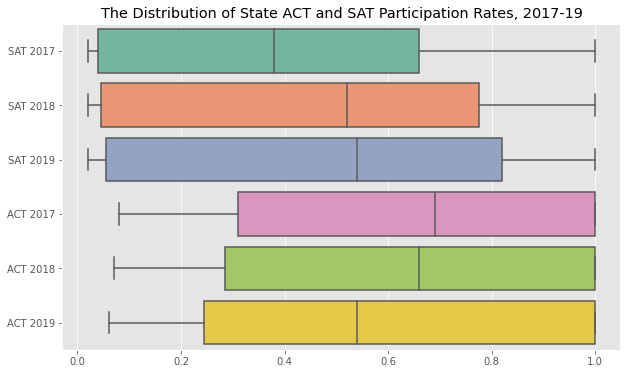

In [142]:
participation = total_score.loc[:,['participation_sat2017','participation_sat2018','participation_sat2019','participation_act2017','participation_act2018','participation_act2019']]
participation = participation.rename(columns={'participation_sat2017':'SAT 2017',
                                                    'participation_sat2018':'SAT 2018',
                                                    'participation_sat2019':'SAT 2019',
                                                    'participation_act2017':'ACT 2017',
                                                    'participation_act2018':'ACT 2018',
                                                    'participation_act2019':'ACT 2019'})
plt.figure(figsize=(10,6))
plt.title('The Distribution of State ACT and SAT Participation Rates, 2017-19')
sns.boxplot(data=participation,orient='h', palette='Set2');

### What is the relationship between SAT participation and SAT total score?

- Negative correlation
- The participation increases and gives the higher of the divider. So, the average score decreases.
- The distribution of score in all 3 years are the same pattern that means the school should improve student to get a higher level of knowledge.

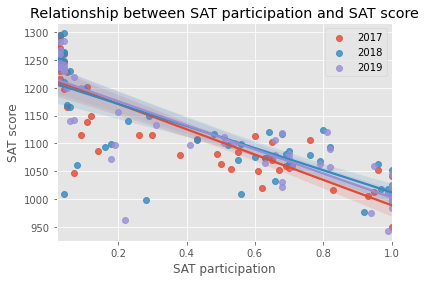

In [143]:
sns.regplot(x='participation_sat2017', y='total_sat2017', data=total_score, label="2017")
sns.regplot(x='participation_sat2018', y='total_sat2018', data=total_score, label="2018")
sns.regplot(x='participation_sat2019', y='total_sat2019', data=total_score, label = "2019")
plt.xlabel('SAT participation')
plt.ylabel('SAT score')
plt.title('Relationship between SAT participation and SAT score')
plt.legend();

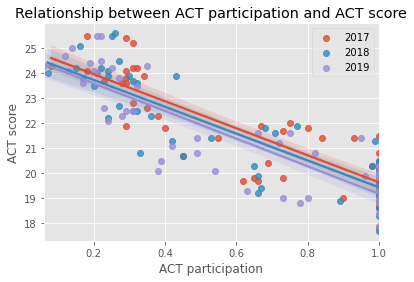

In [144]:
sns.regplot(x='participation_act2017', y='composite_act2017', data=total_score, label="2017")
sns.regplot(x='participation_act2018', y='composite_act2018', data=total_score, label="2018")
sns.regplot(x='participation_act2019', y='composite_act2019', data=total_score, label = "2019")
plt.xlabel('ACT participation')
plt.ylabel('ACT score')
plt.title('Relationship between ACT participation and ACT score')
plt.legend();

### Heat map to show the rate change of participation

- Difference of participation rate in Ohio increases dramatically (2017-2018) because Ohio schools offered ACT or SAT to all students with no charge. The ACT was the overwhelming preference of college-bound kids these days
([*source*](https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors)).

- Students prefer ACT more than SAT if they can choose.

- Difference of participation rate in Colorado declines significantly (2017-2018) because Colorado switched from mandatory ACT to mandatory SAT testing and free to students and Illinois also switched to the SAT. Therefore, the percentage of SAT participation rate difference of both state in 2017-2018 rises sharply  ([*source*](https://www.testive.com/colorado-sat-change-2017/)).

- West Virginia offered free SAT School Day for every students so the participation in 2019 rises significantly ([*source*](https://collegereadiness.collegeboard.org/sat/k12-educators/sat-school-day/about)).  

#### 1. Import plotly.graph_objects

In [145]:
import plotly.graph_objects as go

#### 2. Create dataframe for the difference of participation rate for each year

In [146]:
df_dif = total_score[['state','dif_act_participation_2017_2018', 'dif_act_participation_2018_2019', 'dif_sat_participation_2017_2018', 'dif_sat_participation_2018_2019']]

In [147]:
df_dif.head()

state  dif_act_participation_2017_2018  \
0     Alabama                             0.00   
1      Alaska                            -0.32   
2     Arizona                             0.04   
3    Arkansas                             0.00   
4  California                            -0.04   

   dif_act_participation_2018_2019  dif_sat_participation_2017_2018  \
0                             0.00                             0.01   
1                             0.05                             0.05   
2                             0.07                            -0.01   
3                             0.00                             0.02   
4                            -0.04                             0.07   

   dif_sat_participation_2018_2019  
0                             0.01  
1                            -0.02  
2                             0.02  
3                             0.01  
4                             0.03

#### 3. Import code of state from .csv file with pandas

In [148]:
code = pd.read_csv('data/code.csv')
code.head()

state  Abbrev Code
0     Alabama    Ala.   AL
1      Alaska  Alaska   AK
2     Arizona   Ariz.   AZ
3    Arkansas    Ark.   AR
4  California  Calif.   CA

#### 4. Merge code with df_dif data set

The target column for merging is 'code'

In [149]:
df_dif_code = df_dif.merge(code, on= 'state')
display(df_dif_code.shape)
df_dif_code.head()

(51, 7)

state  dif_act_participation_2017_2018  \
0     Alabama                             0.00   
1      Alaska                            -0.32   
2     Arizona                             0.04   
3    Arkansas                             0.00   
4  California                            -0.04   

   dif_act_participation_2018_2019  dif_sat_participation_2017_2018  \
0                             0.00                             0.01   
1                             0.05                             0.05   
2                             0.07                            -0.01   
3                             0.00                             0.02   
4                            -0.04                             0.07   

   dif_sat_participation_2018_2019  Abbrev Code  
0                             0.01    Ala.   AL  
1                            -0.02  Alaska   AK  
2                             0.02   Ariz.   AZ  
3                             0.01    Ark.   AR  
4                             0.03  Calif.   CA

#### 5. Create heat map using column 'code' instead of 'state'
***ACT participation 17-18***

In [150]:
fig = go.Figure(data=go.Choropleth(
    locations=df_dif_code['Code'], # Spatial coordinates
    z = df_dif_code['dif_act_participation_2017_2018'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "% difference",
))

fig.update_layout(
    title_text = 'Difference in ACT participation rate between 2017 and 2018',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

***ACT participation 18-19***

In [151]:
fig = go.Figure(data=go.Choropleth(
    locations=df_dif_code['Code'], # Spatial coordinates
    z = df_dif_code['dif_act_participation_2018_2019'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Blues',
    colorbar_title = "% difference",
))

fig.update_layout(
    title_text = 'Difference in ACT participation rate between 2018 and 2019',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

***SAT participlation 17-18***

In [152]:
fig = go.Figure(data=go.Choropleth(
    locations=df_dif_code['Code'], # Spatial coordinates
    z = df_dif_code['dif_sat_participation_2017_2018'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    colorbar_title = "% difference",
))

fig.update_layout(
    title_text = 'Difference in SAT participation rate between 2017 and 2018',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

***SAT participlation 18-19***

In [153]:
fig = go.Figure(data=go.Choropleth(
    locations=df_dif_code['Code'], # Spatial coordinates
    z = df_dif_code['dif_sat_participation_2018_2019'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Oranges',
    colorbar_title = "% difference",
))

fig.update_layout(
    title_text = 'Difference in SAT participation rate between 2018 and 2019',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

### West Virginia participation rate and total/composite score change 

Due to the new policy in West Virginia, SAT participation increases while ACT participation decreases during the period. The change of participation rate impacts on total score because SAT total score of this state decreases while ACT composite score increases.

In [154]:
wv = total_score[total_score['state'] == 'West Virginia']

In [155]:
wv

state  participation_act2017  composite_act2017  \
48  West Virginia                   0.69               20.4   

    participation_act2018  composite_act2018  participation_act2019  \
48                   0.65               20.3                   0.49   

    composite_act2019  participation_sat2017  reading_writing_sat2017  \
48               20.8                   0.14                      558   

    math_sat2017  ...  math_sat2018  total_sat2018  participation_sat2019  \
48           528  ...           486            999                   0.99   

    reading_writing_sat2019  math_sat2019  total_sat2019  \
48                      483           460            943   

    dif_act_participation_2017_2018  dif_act_participation_2018_2019  \
48                            -0.04                            -0.16   

    dif_sat_participation_2017_2018  dif_sat_participation_2018_2019  
48                             0.14                             0.71  

[1 rows x 23 columns]

In [156]:
def state_melt(df, variable):
    
    """this function convert dataframe by .melt and create new columns named 'year' and 'type' 
    which are used the group data by .groupby 
    df = name of dataframe
    variable = the chosen column name to apply this function"""
    
    df_melt = df.melt(id_vars = 'state')
    df_melt['year'] = df_melt[variable].apply(lambda x : x[len(x)-4:])
    df_melt['type'] = df_melt[variable].apply(lambda x : x[0:(len(x)-4)])
    result = df_melt.groupby(['year', 'type'])[['value']].sum()
    result.reset_index(inplace = True)
    return result

In [157]:
wv_melt = state_melt(wv, 'variable')

In [158]:
wv_melt

year                         type    value
0   2017                composite_act    20.40
1   2017                     math_sat   528.00
2   2017            participation_act     0.69
3   2017            participation_sat     0.14
4   2017          reading_writing_sat   558.00
5   2017                    total_sat  1086.00
6   2018                composite_act    20.30
7   2018  dif_act_participation_2017_    -0.04
8   2018  dif_sat_participation_2017_     0.14
9   2018                     math_sat   486.00
10  2018            participation_act     0.65
11  2018            participation_sat     0.28
12  2018          reading_writing_sat   513.00
13  2018                    total_sat   999.00
14  2019                composite_act    20.80
15  2019  dif_act_participation_2018_    -0.16
16  2019  dif_sat_participation_2018_     0.71
17  2019                     math_sat   460.00
18  2019            participation_act     0.49
19  2019            participation_sat     0.99
20  2019          reading_writing_sat   483.00
21  2019                    total_sat   943.00

In [159]:
def line_graph(df, col, value, ax, ay, marker, color, xlabel, ylabel, title):
    
    """This function use to plot the line graph
    df = Name of dataframe
    col = column that you want to focus
    value = value in column that you want to focus
    ax = value for x axis
    ay = value for y axis
    marker = marker
    color = color of line
    xlabel = label of x axis
    ylabel = label of y axis
    title = title of graph"""
    
    df[df[col] == value].plot(x = ax, y = ay, marker = marker, color = color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title);
    plt.show()
    

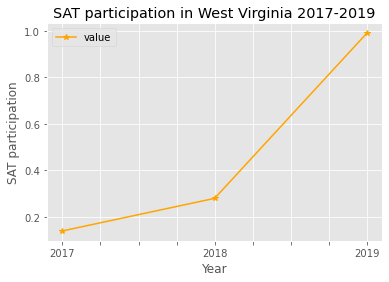

In [160]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(wv_melt, 'type', 'participation_sat', 'year', 'value', marker = '*', color = 'orange',
           xlabel ='Year', ylabel = 'SAT participation', title = 'SAT participation in West Virginia 2017-2019')

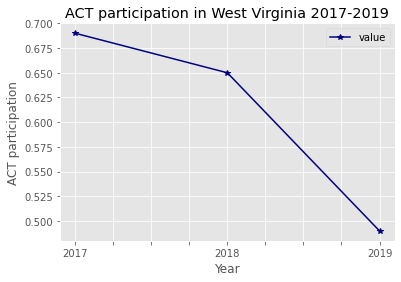

In [161]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(wv_melt, 'type', 'participation_act', 'year', 'value', marker = '*', color = 'navy', 
           xlabel ='Year', ylabel = 'ACT participation', title = 'ACT participation in West Virginia 2017-2019')

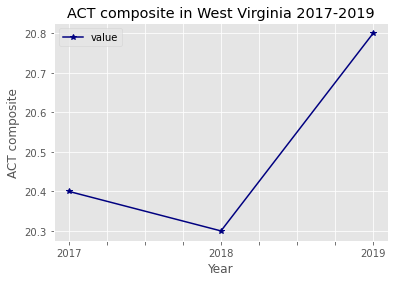

In [162]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(wv_melt, 'type', 'composite_act', 'year', 'value', marker = '*', color = 'navy', 
           xlabel ='Year', ylabel = 'ACT composite', title = 'ACT composite in West Virginia 2017-2019')

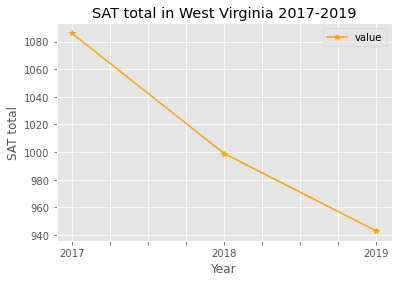

In [163]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(wv_melt, 'type', 'total_sat', 'year', 'value', marker = '*', color = 'orange', 
           xlabel ='Year', ylabel = 'SAT total', title = 'SAT total in West Virginia 2017-2019')

## Colorado

- Participation rate 2017-2018 increases signifcantly because of the policy that requires all students take SAT test to graduate from high school. 
- Perticipation rate rises up to 100%, however, the overall SAT total score drops because of higher divider.

In [164]:
cd = total_score[total_score['state'] == 'Colorado']

In [165]:
cd

state  participation_act2017  composite_act2017  participation_act2018  \
5  Colorado                    1.0               20.8                    0.3   

   composite_act2018  participation_act2019  composite_act2019  \
5               23.9                   0.27               23.8   

   participation_sat2017  reading_writing_sat2017  math_sat2017  ...  \
5                   0.11                      606           595  ...   

   math_sat2018  total_sat2018  participation_sat2019  \
5           506           1025                    1.0   

   reading_writing_sat2019  math_sat2019  total_sat2019  \
5                      518           506           1024   

   dif_act_participation_2017_2018  dif_act_participation_2018_2019  \
5                             -0.7                            -0.03   

   dif_sat_participation_2017_2018  dif_sat_participation_2018_2019  
5                             0.89                              0.0  

[1 rows x 23 columns]

In [166]:
#Melt and group dataframe by function named 'state_melt' that I created above.
cd_melt = state_melt(cd, 'variable')

In [167]:
cd_melt.head()

year                 type   value
0  2017        composite_act   20.80
1  2017             math_sat  595.00
2  2017    participation_act    1.00
3  2017    participation_sat    0.11
4  2017  reading_writing_sat  606.00

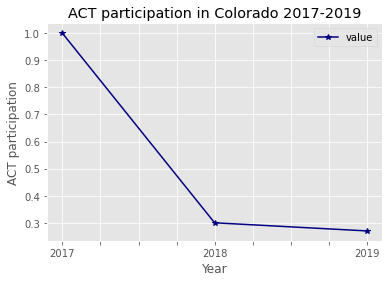

In [168]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(cd_melt, 'type', 'participation_act', 'year', 'value', marker = '*', color = 'navy',
           xlabel ='Year', ylabel = 'ACT participation', title = 'ACT participation in Colorado 2017-2019')

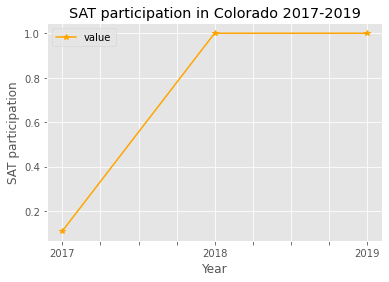

In [169]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(cd_melt, 'type', 'participation_sat', 'year', 'value', marker = '*', color = 'orange',
           xlabel ='Year', ylabel = 'SAT participation', title = 'SAT participation in Colorado 2017-2019')

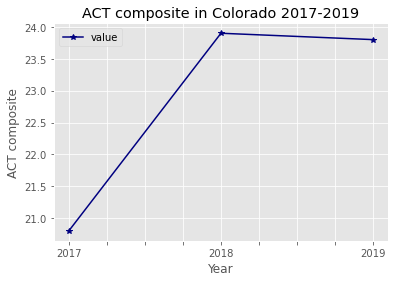

In [170]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(cd_melt, 'type', 'composite_act', 'year', 'value', marker = '*', color = 'navy',
           xlabel ='Year', ylabel = 'ACT composite', title = 'ACT composite in Colorado 2017-2019')

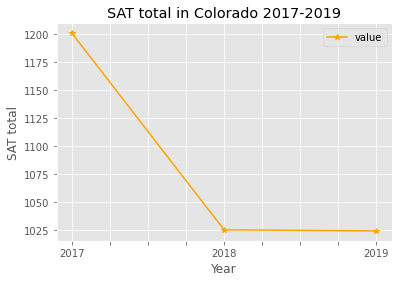

In [171]:
#Plot graph by function name 'line_graph' that I created above.
line_graph(cd_melt, 'type', 'total_sat', 'year', 'value', marker = '*', color = 'orange',
           xlabel ='Year', ylabel = 'SAT total', title = 'SAT total in Colorado 2017-2019')

## Correlation

- Participation rate are highly negative correlated with average score on that test (r ~ -0.8). This directly indicates the selection bias effect. Lower participation typically means higher mean scores because the increased participation adds more divider when calculate the average score. 
- Average score on sections of a given test are positive correlated with average scores for other sections of that test and total score for that test. 
- Average score of SAT are negative correlated with average score of ACT. This is the result of the increasing of participation of SAT that reduce the students who take ACT. So, the higher student make higher divider.

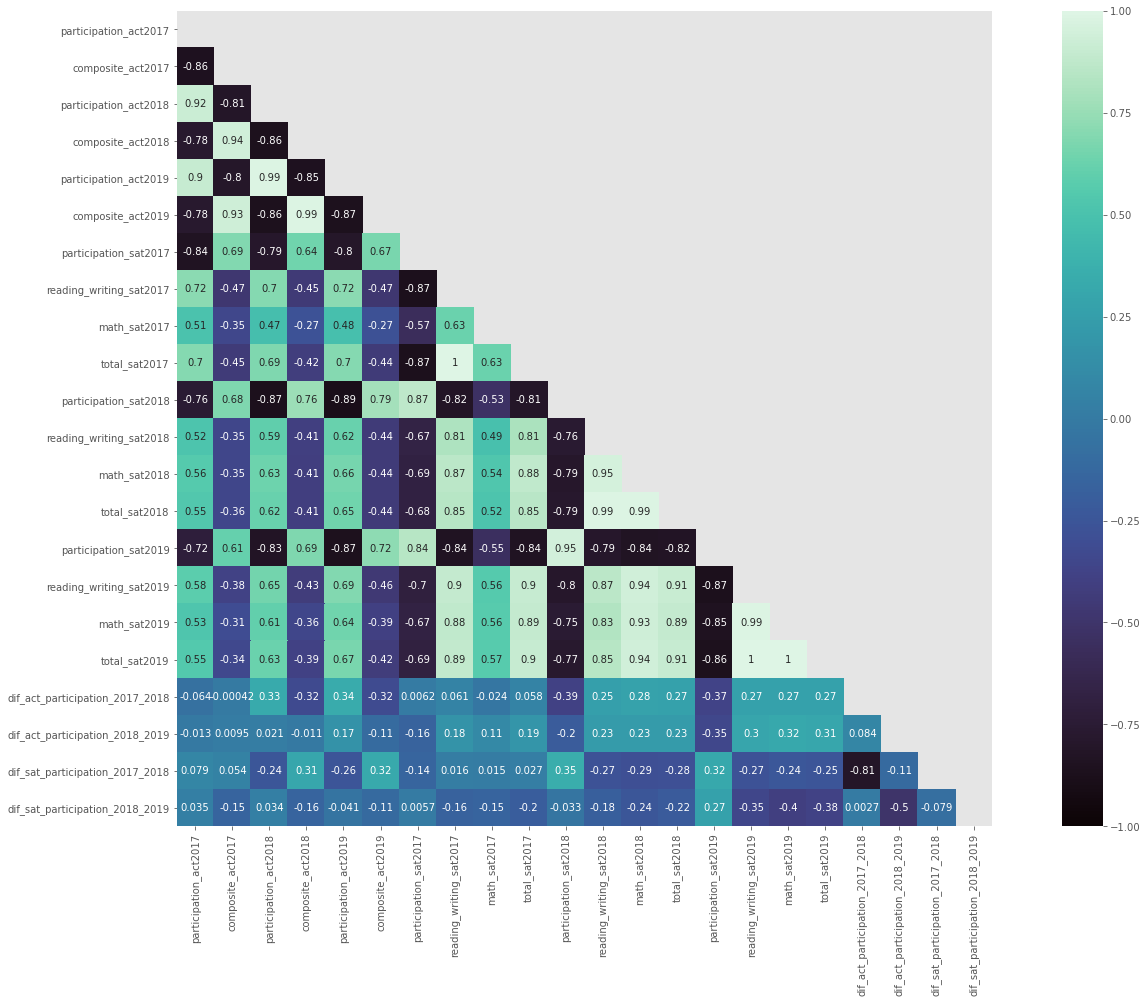

In [172]:
plt.figure(figsize = (25,15))
corr = total_score.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, square = True, cmap = 'mako', annot = True, vmin = -1, vmax = 1);

### How about SAT score in West Virginia?

- West Virginia's is lower than mean score of SAT score 2018 and 2019.
- West Virginia is the loser of score in 2019.
- The distribution of score in 2018 and 2019 are not normal distribution which has the high density between 1000 - 1100.

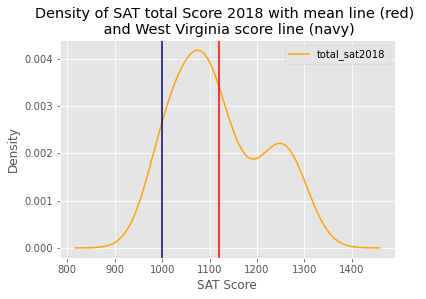

In [173]:
total_score.total_sat2018.plot(kind='density', color = 'orange', legend = True)
plt.axvline(x = wv['total_sat2018'].values, color = 'navy');
plt.axvline(x = np.mean(total_score['total_sat2018']), color = 'red')
plt.xlabel('SAT Score')
plt.title('Density of SAT total Score 2018 with mean line (red) \n and West Virginia score line (navy)');

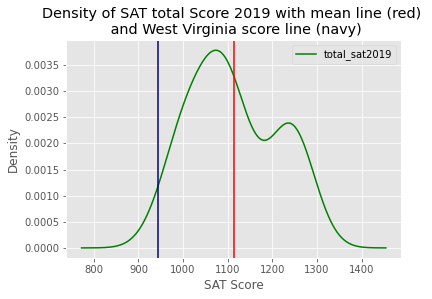

In [174]:
total_score.total_sat2019.plot(kind='density', color = 'green', legend = True)
plt.axvline(x = wv['total_sat2019'].values, color = 'navy');
plt.axvline(x = np.mean(total_score['total_sat2019']), color = 'red')
plt.xlabel('SAT Score')
plt.title('Density of SAT total Score 2019 with mean line (red) \n and West Virginia score line (navy)');

### How about SAT score in West Virginia when compared with university admission score?
- West Virginia's score is lower than the median of 25th percentile of SAT score.
- To increase chance for university admission, West Virginia should encourages school and student to hit the median score of university admission (1150). This will help student to have more university choice that they will choose.

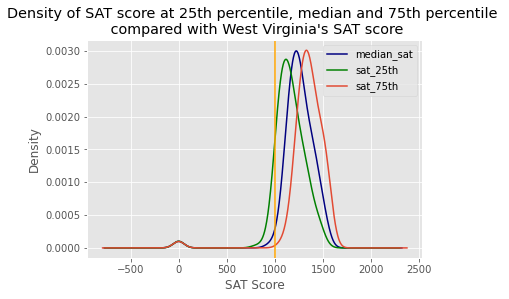

In [175]:
df_uni.median_sat.plot(kind='density', color = 'navy', legend = True)
df_uni.sat_25th.plot(kind='density', color = 'green' , legend = True)
df_uni.sat_75th.plot(kind='density', legend = True)
plt.xlabel('SAT Score')
plt.title("Density of SAT score at 25th percentile, median and 75th percentile \n compared with West Virginia's SAT score")
plt.axvline(x = wv['total_sat2018'].values, color = 'orange');

## Conclusions and Recommendations

**Problem Statement**

West Virginia has the policy to increase the participation rate in 2018 by offering the free SAT School DAY to students. The aim of this policy is opening the door to college, university and scholarship. This policy increased the participation rate significantly, but the total score did not increase. So, if West Virginia wants to increase both participation rate and average score. How to adjust the policy to be more effective?

**Conclusions & Recommendations**

According to data analysis, students preferred to take the SAT more than the ACT, and it seems like the SAT and the ACT will have the same level of preference from student because the average SAT and ACT participation are the same number (nearly 50%). The increased participation rate gives positive effects on the number of test taker, but not on the average score of the test. The participation rate is negative correlated with the average score. Many states are facing this problem such as Colorado and Illinois, including West Virginia. These states have the policy to convince students to take exam namely mandatory SAT testing and free SAT School Day. 

According to the data, it shows that West Virginia's SAT participation increases by 70% but the average score decreases slightly, that opposite of the ACT. Colorado also has this problem, mandatory SAT policy made SAT participation 2018 hit 100% but the score decreases. West Virginia's SAT score is lower than the mean score in both two years (2018-2019) which means West Virginia's has a low score before the new policy.

West Virginia offers free SAT School Day to all students to increases the chance for university admission. Therefore, students in West Virginia should take the test and get more score at 1150 to reach the median score of university admission. West Virginia should make SAT testing to be a part of graduation requirements without free SAT School Day and determine the range of score to graduate and get a free SAT School Day test. The lowest score for graduation should not lower than the mean score of West Virginia in the previous year, and if a student's score reaches the average median of university admission they will get the free SAT School Day (return the fund). This new policy will encourage the student to prepare for testing and the school will give more training to the student. Students will get 2 ways of benefits, getting high score of the SAT without cost ans getting more training from school. West Virginia will get the better score rank and can assess the real quality of school through the SAT.
